In [1296]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import astropy
from astropy.io import fits
import astropy.wcs
#from astropy import units as u

%matplotlib inline

In [1297]:
import light_echo as le

In [1298]:
import scipy as sp
from scipy.interpolate import splev, splrep


In [1299]:
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

plt.rcParams['axes.labelsize'] = 16

plt.rcParams['legend.fontsize'] = 16

In [1300]:
def remove_peak(x, y, peak_idx=[], width_idx=10, height=1, ):
    """remove the telluric peak
    Parameters:
        x, y: array
        width_idx: int, width of the points to remove
    
    """
    #if len(peak_idx)==0:
        # find the peak location use scipy.signal
    #    peak_idx, peak_dict = signal.find_peaks(y, height=height, width=0)
    
    #for peak_id in peak_idx:
    # find the index of peak area
 
    peak_left = np.concatenate([peak_idx - i for i in range(width_idx)])
    peak_right = np.concatenate([peak_idx + i for i in range(width_idx)])
    peak_area = np.concatenate([peak_left, peak_right])
    peak_area.sort()
    
    # linear interpolate peak area
    y_nopeak = y.copy()
    no_peak_area = np.delete(np.arange(0, len(x)), peak_area)
    y_nopeak[peak_area] = np.interp(x[peak_area], 
                                    x[no_peak_area], 
                                    y[no_peak_area])
    
    return y_nopeak
    


In [1318]:
df_LE1= pd.read_csv("./LEDATA/LE1-combined.flm", delim_whitespace=True, 
            names=['wavelength', 'flux', 'flux_err'])
df_LE3= pd.read_csv("./LEDATA/LE3-combined.flm", delim_whitespace=True, 
            names=['wavelength', 'flux', 'flux_err'])
df_LE2= pd.read_csv("./LEDATA/LE2-combined-redo.flm", 
            delim_whitespace=True, 
            names=['wavelength', 'flux', 'flux_err'])

Text(0, 0.5, 'flux')

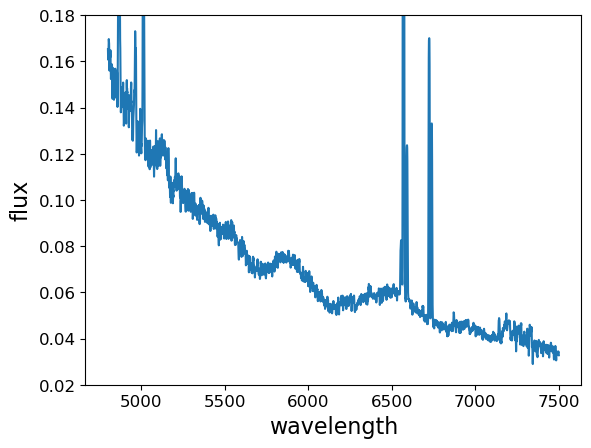

In [1323]:
plt.plot(df_LE2.wavelength, df_LE2.flux)
plt.ylim([0.02, 0.18])
plt.xlabel('wavelength')
plt.ylabel('flux')

In [1302]:
for df in [df_LE1, df_LE2, df_LE3]:
    
    #y_nopeak = remove_peak(df.wavelength, df.flux, 
    #                   peak_idx=np.array([1770, 1923]),
    #                   width_idx=30)

    #y_nopeak = remove_peak(df.wavelength, y_nopeak, 
    #                   peak_idx=np.array([66, 212, 164, 2441, 2477]),
    #                  width_idx=10)

    
    y_nopeak = remove_peak(df.wavelength, df.flux, 
                       peak_idx=np.array([ 1769, 67, 1774, 1770, 1923,
                                          163, 62,1764, 1937, 1790,
                                          214, 1755, 2070]),
                       width_idx=8)
    
    # smooth
    y_smooth = pd.Series(y_nopeak).rolling(window=30, center=True).mean() \
                          .fillna(method='bfill').fillna(method='ffill').values
    df['flux_nopeak'] = y_nopeak
    df['flux_smooth'] = y_smooth
    
    df['flux_nopeak_norm'] = y_nopeak / y_smooth.max()
    df['flux_smooth_norm'] = y_smooth / y_smooth.max()

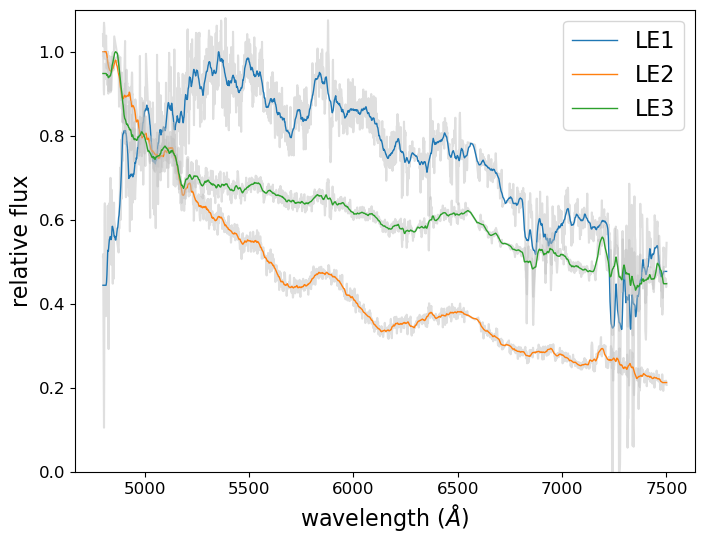

In [1303]:
plt.figure(figsize=(8, 6))


for label, df in zip(['LE1', 'LE2', 'LE3'], [df_LE1, df_LE2, df_LE3]):

    plt.plot(df.wavelength, df.flux_nopeak_norm, alpha=0.5, color='silver')
    plt.plot(df.wavelength, df.flux_smooth_norm, label=label, linewidth=1)

    #plt.xlim(6500, 7000)
    #plt.ylim(0.005, 0.02)
plt.ylim([0, 1.1])
plt.xlabel(r'wavelength ($\AA$)')
plt.ylabel('relative flux')
plt.legend()
plt.savefig('LE_spectra.png', dpi=200)

#plt.xlim([7200, 7400])

In [353]:
np.diff(df.wavelength)

array([1., 1., 1., ..., 1., 1., 1.])

In [275]:
df_LE3[['wavelength', 'flux_smooth']].to_csv("../../snid-5.0/test/LE3_smoothed.txt", 
                                             index=False, header=False,
                                             sep=' ', )

In [988]:
df_LEtemplist = pd.read_csv("LEtemp/txt/snidlist.txt", 
                        names=['Object', 'Type', 'subtype', 'Filename', 'Age', 
                               'Age_flag', 'Delta', 'AB?', 'wave_min',
                               'wave_max', 'Redshift'],
                        delim_whitespace=True, )

In [989]:
#df_LEtemplist.to_csv("LEtemp/df_LEtemplist.csv", index=False, sep=' ')

In [990]:
df_LEtemplist

Object Type subtype             Filename  Age  Age_flag  Delta  AB?  \
0    91T-LE   Ia  Ia-91T   LEtemp_SN1991T.txt    0         0  -9.99    0   
1   91bg-LE   Ia  Ia Pec  LEtemp_SN1991bg.txt    0         0  -9.99    0   
2    94D-LE   Ia      Ia   LEtemp_SN1994D.txt    0         0  -9.99    0   
3    96X-LE   Ia      Ia   LEtemp_SN1996X.txt    0         0  -9.99    0   
4   97br-LE   Ia  Ia Pec  LEtemp_SN1997br.txt    0         0  -9.99    0   
..      ...  ...     ...                  ...  ...       ...    ...  ...   
74  12aw-LE  IIP    II P  LEtemp_SN2012aw.txt    0         0  -9.99    0   
75  13ab-LE  IIP    II P  LEtemp_SN2013ab.txt    0         0  -9.99    0   
76  13am-LE  IIP      II  LEtemp_SN2013am.txt    0         0  -9.99    0   
77  13ej-LE  IIP      II  LEtemp_SN2013ej.txt    0         0  -9.99    0   
78  14cy-LE  IIP      II  LEtemp_SN2014cy.txt    0         0  -9.99    0   

    wave_min  wave_max  Redshift  
0     3500.0    9998.0       0.0  
1     3500.0    9998.0       0.0  
2     3500.0    9998.0       0.0  
3     3500.0    9998.0       0.0  
4     3500.0    9998.0       0.0  
..       ...       ...       ...  
74    3500.0    9998.0       0.0  
75    3500.0    9998.0       0.0  
76    3500.0    9998.0       0.0  
77    3500.0    9998.0       0.0  
78    3500.0    9998.0       0.0  

[79 rows x 11 columns]

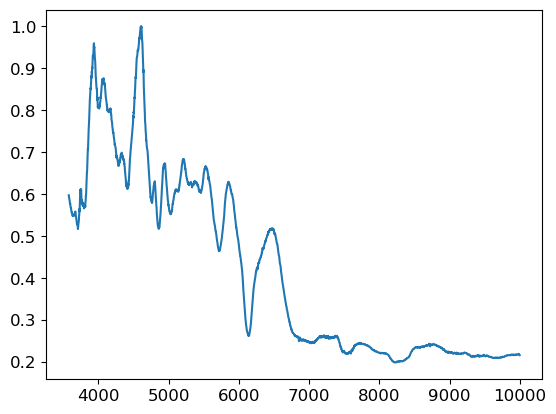

In [991]:
txtfile = df_LEtemplist['Filename'][2]

df_LEtemp = pd.read_csv('LEtemp/snid_txt/'+txtfile, skiprows=2,
            names=['wavelength', 'flux'],
            delim_whitespace=True, )

plt.plot(df_LEtemp.wavelength, df_LEtemp.flux)

In [992]:
def cut_spectra(wave, flux, wmin=4800, wmax=7800, renorm=False):
    idx_cut = (wave>wmin) & (wave<wmax)
    flux_cut = flux[idx_cut]
    wave_cut = wave[idx_cut]
    if renorm:
        flux_cut = flux_cut/flux_cut.max()
    return wave_cut, flux_cut

In [993]:
def scale_spectra(le_spectra, offset, scale=1):
    return scale * le_spectra - offset


def dist_fun(p, le_spectra, sn_spectra):
    assert len(p)<=2, "distance parameter should be smaller or equal to 2"
    if len(p)==2:
        scale, offset = p
    elif len(p)==1:
        offset = p[0]
        scale = 1
    
    dist = sp.spatial.distance.euclidean( 
        scale_spectra(le_spectra, offset, scale), sn_spectra) 
    
    #print(scale, offset, dist)

    return dist
    

In [994]:
def remove_continum(wave, flux, step=600):
    """remove continum use a spline fit"""

    x = wave[::600]
    y = flux[::600]
    spl = splrep(x, y, )
    x2 = wave
    y2 = splev(x2, spl)
    
    y_nocont = flux-y2

    #plt.plot(wave, flux, '.', x2, y2)
    #plt.ylim([0, 1.1])
    return y_nocont, y2

In [995]:
dic_LE = {'LE1':df_LE1,
          'LE2':df_LE2,
          'LE3':df_LE3,
         }

In [1407]:
leId = 'LE2'

df_LE = dic_LE[leId]
    
no_continum = True
scales = []
offsets = []
dis = []
res = []
for i in range(len(df_LEtemplist)):
    # minimize distance by scale and offset

    txtfile = df_LEtemplist['Filename'].values[i]

    df_LEtemp = pd.read_csv('LEtemp/snid_txt/'+txtfile, skiprows=2,
            names=['wavelength', 'flux'],
            delim_whitespace=True, )

    
    LEobs_wave = df_LE.wavelength.values
    LEobs_flux = df_LE.flux_smooth_norm.values
    
    LEtemp_wave = df_LEtemp.wavelength.values
    LEtemp_flux = df_LEtemp.flux.values
    
    
    # remove continum
    if no_continum:
        LEtemp_flux, LEobs_flux_cont= remove_continum(LEtemp_wave, LEtemp_flux, step=600)
    
        LEobs_flux, LEobs_flux_cont= remove_continum(LEobs_wave, LEobs_flux, step=600)

    
    
    LEobs_wave_cut, LEobs_flux_cut = cut_spectra(LEobs_wave, LEobs_flux, renorm=False,
                                                 wmin=5200, wmax=7200)

    LEtemp_wave_cut, LEtemp_flux_cut = cut_spectra(LEtemp_wave, LEtemp_flux, renorm=False,
                                                 wmin=5500, wmax=7200)
    
    
    
    # interp to observed wavelength
    LEtemp_flux_cut = np.interp(LEobs_wave_cut, LEtemp_wave, LEtemp_flux)

    results = sp.optimize.minimize(dist_fun, x0=(1, 0), bounds=((1, 5), (None, None)),
                          args=(LEobs_flux_cut, LEtemp_flux_cut))
    
    res.append(results)
    scales.append(results['x'][0])
    offsets.append(results['x'][1])
    dis.append(results['fun'])

In [1408]:
#wave = LEtemp_wave
#flux = LEtemp_flux 
#
#flux_nocont, flux_cont = remove_continum(wave, flux, step=600)
#
#plt.plot(wave, flux_nocont)
#plt.plot(wave, flux)
#plt.plot(wave, flux_cont)

In [1409]:
df_LEtemplist['res'] = res
df_LEtemplist['scale'] = scales
df_LEtemplist['offset'] = offsets
df_LEtemplist['dist'] = dis

In [1410]:
np.unique(df_LEtemplist.Type)

array(['IIP', 'IIb', 'Ia', 'Ib', 'Ic'], dtype=object)

In [1411]:
df_LEtemplist.groupby(['Type', 'subtype']).mean()

/var/folders/pp/94p2lf0x2s53qs8cjp590jp80000gn/T/ipykernel_14982/1711086769.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_LEtemplist.groupby(['Type', 'subtype']).mean()


Age  Age_flag  Delta  AB?  wave_min  wave_max  Redshift  \
Type subtype                                                            
IIP  II       0.0       0.0  -9.99  0.0    3500.0    9998.0       0.0   
     II P     0.0       0.0  -9.99  0.0    3500.0    9998.0       0.0   
IIb  IIb      0.0       0.0  -9.99  0.0    3500.0    9998.0       0.0   
Ia   Ia       0.0       0.0  -9.99  0.0    3500.0    9998.0       0.0   
     Ia Pec   0.0       0.0  -9.99  0.0    3500.0    9998.0       0.0   
     Ia-91T   0.0       0.0  -9.99  0.0    3500.0    9998.0       0.0   
Ib   IIb      0.0       0.0  -9.99  0.0    3500.0    9998.0       0.0   
     Ib       0.0       0.0  -9.99  0.0    3500.0    9998.0       0.0   
Ic   IIb      0.0       0.0  -9.99  0.0    3500.0    9998.0       0.0   
     Ic       0.0       0.0  -9.99  0.0    3500.0    9998.0       0.0   
     Ic BL    0.0       0.0  -9.99  0.0    3500.0    9998.0       0.0   

                 scale    offset      dist  
Type subtype                                
IIP  II       1.159045 -0.015702  4.978981  
     II P     1.017722 -0.025689  5.314200  
IIb  IIb      1.840774  0.011521  6.074326  
Ia   Ia       2.692062 -0.072509  2.718894  
     Ia Pec   2.886117 -0.058369  3.293734  
     Ia-91T   1.777961 -0.028605  1.401694  
Ib   IIb      2.325626  0.017864  5.228865  
     Ib       2.206452 -0.016048  4.299122  
Ic   IIb      2.043374 -0.035191  5.998448  
     Ic       2.330425 -0.045158  3.756020  
     Ic BL    1.219136 -0.067969  2.940949

In [1412]:
df_results = pd.DataFrame(columns=['Object', 'dist_LE1', 'dist_LE2', 'dist_LE3'])



In [1413]:
df_results['Object'] = df_LEtemplist['Object'].values

df_results[f'dist_{leId}'] = df_LEtemplist['dist'].values


In [1415]:
df_results

Object dist_LE1  dist_LE2 dist_LE3
0    91T-LE      NaN  1.573276      NaN
1   91bg-LE      NaN  3.619417      NaN
2    94D-LE      NaN  1.848625      NaN
3    96X-LE      NaN  2.054629      NaN
4   97br-LE      NaN  2.436508      NaN
..      ...      ...       ...      ...
74  12aw-LE      NaN  5.645554      NaN
75  13ab-LE      NaN  5.527251      NaN
76  13am-LE      NaN  3.979380      NaN
77  13ej-LE      NaN  5.242738      NaN
78  14cy-LE      NaN  4.191179      NaN

[79 rows x 4 columns]

In [1391]:
leId

'LE2'

In [1392]:
df_LEtemplist.sort_values(by='dist')

Object Type subtype             Filename  Age  Age_flag  Delta  AB?  \
5   98aq-LE   Ia      Ia  LEtemp_SN1998aq.txt    0         0  -9.99    0   
7   99aa-LE   Ia  Ia-91T  LEtemp_SN1999aa.txt    0         0  -9.99    0   
29  08bf-LE   Ia      Ia  LEtemp_SN2008bf.txt    0         0  -9.99    0   
16  03du-LE   Ia      Ia  LEtemp_SN2003du.txt    0         0  -9.99    0   
9   00cx-LE   Ia  Ia Pec  LEtemp_SN2000cx.txt    0         0  -9.99    0   
..      ...  ...     ...                  ...  ...       ...    ...  ...   
54   93J-LE  IIb     IIb   LEtemp_SN1993J.txt    0         0  -9.99    0   
63  99gi-LE  IIP      II  LEtemp_SN1999gi.txt    0         0  -9.99    0   
44   14C-LE   Ib      Ib   LEtemp_SN2014C.txt    0         0  -9.99    0   
56  11dh-LE  IIb     IIb  LEtemp_SN2011dh.txt    0         0  -9.99    0   
55  96cb-LE  IIb     IIb  LEtemp_SN1996cb.txt    0         0  -9.99    0   

    wave_min  wave_max  Redshift  \
5     3500.0    9998.0       0.0   
7     3500.0    9998.0       0.0   
29    3500.0    9998.0       0.0   
16    3500.0    9998.0       0.0   
9     3500.0    9998.0       0.0   
..       ...       ...       ...   
54    3500.0    9998.0       0.0   
63    3500.0    9998.0       0.0   
44    3500.0    9998.0       0.0   
56    3500.0    9998.0       0.0   
55    3500.0    9998.0       0.0   

                                                  res     scale    offset  \
5   {'fun': 1.2078831119040823, 'jac': [-3.1086244...  1.709319 -0.032183   
7   {'fun': 1.230112470537631, 'jac': [2.664535275...  1.785156 -0.030452   
29  {'fun': 1.3256318887848084, 'jac': [-8.8817842...  1.584782 -0.069000   
16  {'fun': 1.3453493197327056, 'jac': [-4.4408921...  1.932169 -0.032295   
9   {'fun': 1.4105790202468957, 'jac': [0.25264221...  1.000000  0.011861   
..                                                ...       ...       ...   
54  {'fun': 6.1042623339538, 'jac': [-1.2434497951...  2.108006 -0.050271   
63  {'fun': 6.156347377477865, 'jac': [0.180939619...  1.000000  0.025738   
44  {'fun': 6.3857574113064075, 'jac': [5.32907055...  3.368428 -0.041950   
56  {'fun': 6.88853768154638, 'jac': [-2.309263905...  1.674764  0.061551   
55  {'fun': 8.044317724595079, 'jac': [1.243449795...  1.045169  0.097852   

        dist  
5   1.207883  
7   1.230112  
29  1.325632  
16  1.345349  
9   1.410579  
..       ...  
54  6.104262  
63  6.156347  
44  6.385757  
56  6.888538  
55  8.044318  

[79 rows x 15 columns]

In [1393]:
idxs = []
for typ in ['Ia', 'Ib', 'IIb', 'Ic', 'IIb', 'II P']:
    idx = df_LEtemplist[df_LEtemplist.subtype==typ]\
        .sort_values(by='dist', ascending=True)[:2].index
    print(typ, idx)
    idxs.append([idx[0] ])


Ia Int64Index([5, 29], dtype='int64')
Ib Int64Index([41, 40], dtype='int64')
IIb Int64Index([58, 60], dtype='int64')
Ic Int64Index([51, 50], dtype='int64')
IIb Int64Index([58, 60], dtype='int64')
II P Int64Index([64, 62], dtype='int64')


In [1394]:
idxs = []
for typ in ['Ia', 'Ia-91T', 'Ib', 'Ic', 'IIb', 'II P']:
    idx = df_LEtemplist[df_LEtemplist.subtype==typ]\
        .sort_values(by='dist', ascending=True)[:2].index
    print(typ, idx)
    idxs.append([idx[0] ])


Ia Int64Index([5, 29], dtype='int64')
Ia-91T Int64Index([7, 0], dtype='int64')
Ib Int64Index([41, 40], dtype='int64')
Ic Int64Index([51, 50], dtype='int64')
IIb Int64Index([58, 60], dtype='int64')
II P Int64Index([64, 62], dtype='int64')


In [1395]:
idxs

[[5], [7], [41], [51], [58], [64]]

5 1.709319155997699
7 1.7851562839836332
41 1.9681402729852915
51 1.7079653398073857
58 1.6506908249738033
64 1.0


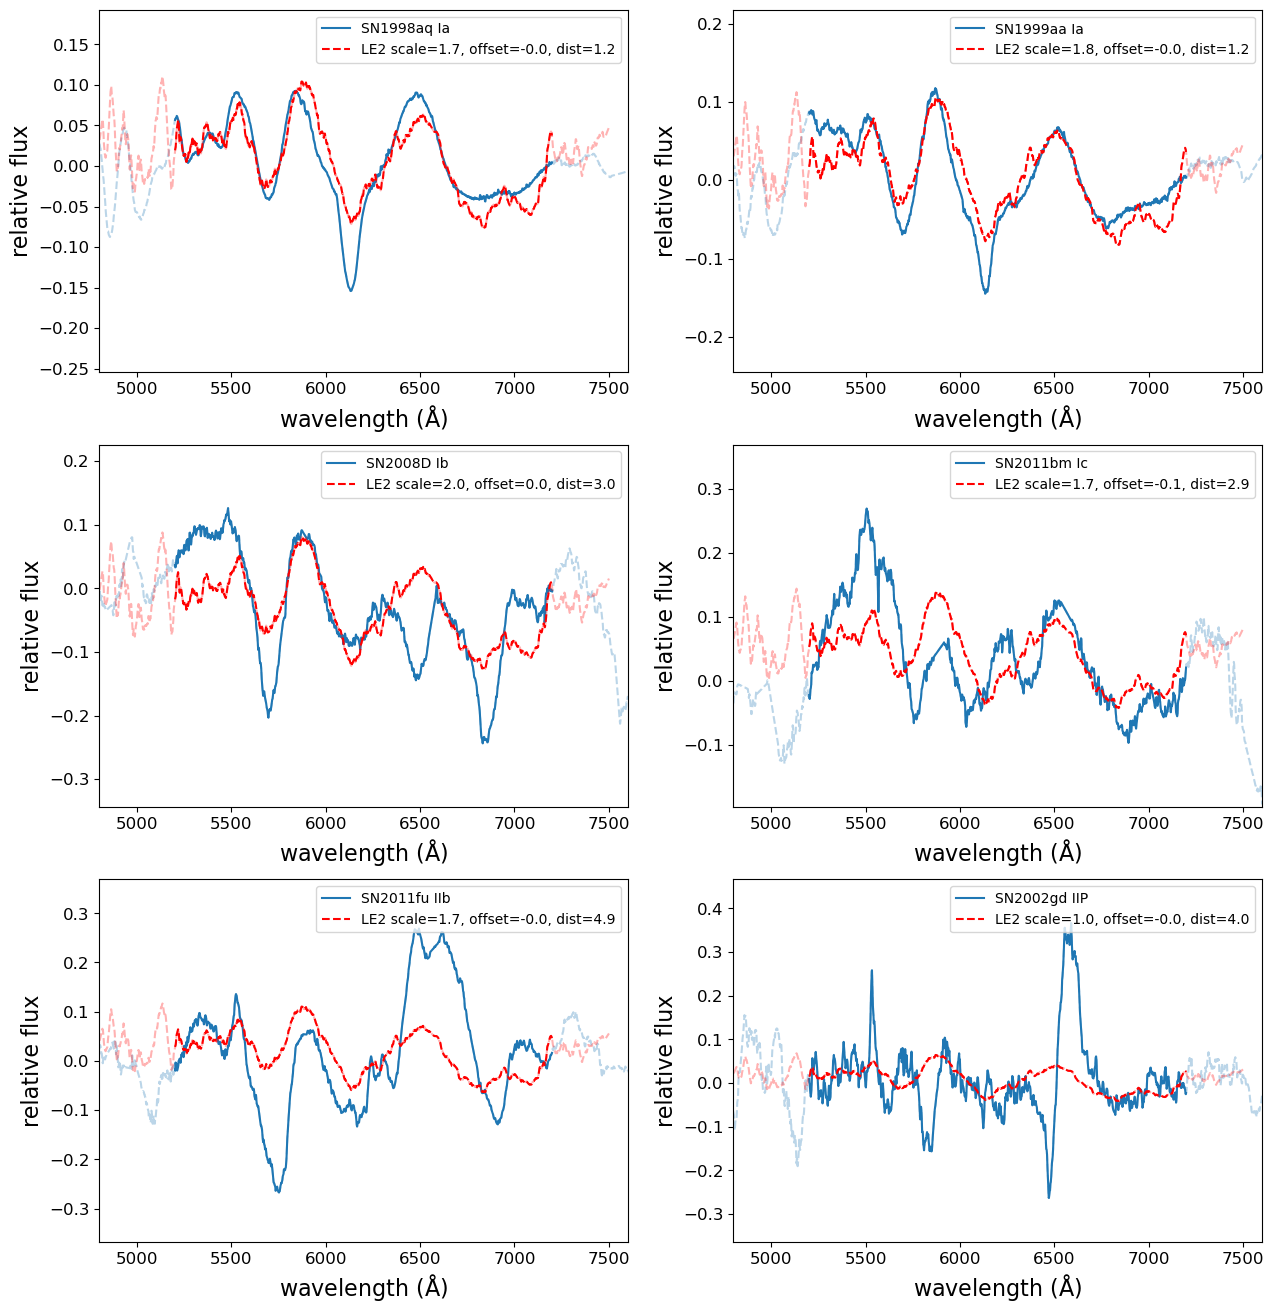

In [1396]:
fig, axs = plt.subplots(3, 2, figsize=(15, 16),)
axs = axs.flatten()
for i, idx in enumerate(idxs):
    fig = plot_comparision(idx[0], ax=axs[i], no_continum=no_continum)
#fig.savefig(f"../../../../Desktop/thesis/figures/{leId}_dist_nocont.png", dpi=200)

0 1.0
1 1.333381482226698
2 1.0
3 1.0
4 1.2754327424596228
5 1.0
6 1.0
7 1.0
8 1.6618177276914368
9 1.0
10 1.0
11 1.446267809497269
12 2.4522112777410467
13 1.9545010380479768
14 1.5601821861314484
15 1.5570043821800341
16 1.0
17 1.0
18 1.518738848235469
19 1.0257654185229523


/var/folders/pp/94p2lf0x2s53qs8cjp590jp80000gn/T/ipykernel_14982/1267526429.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=(8, 6))


20 1.8508418651126333
21 1.0890680757235278
22 1.0
23 2.098026961710887
24 1.0
25 3.314861438491851
26 1.0
27 1.885302441934243
28 1.127849419161206
29 1.0321282095502249
30 1.4913616803946654
31 2.8348591163571553
32 1.0
33 1.0
34 1.0132160371488195
35 1.0
36 1.0
37 1.0
38 1.8434959636566308
39 1.3382109392806165
40 1.0
41 1.0
42 1.0
43 1.0
44 1.0
45 1.0
46 1.0
47 1.0
48 1.0
49 1.0520960496534248
50 1.0
51 1.0797916501452682
52 1.0704233308451168
53 1.0
54 1.0
55 1.0
56 1.0
57 1.0
58 1.0
59 1.0
60 1.0
61 1.0
62 1.0
63 1.0
64 1.0
65 1.0
66 1.0
67 1.0
68 1.0
69 1.0
70 1.0
71 1.0
72 1.0
73 1.0
74 1.0
75 1.0
76 1.0
77 1.0
78 1.0


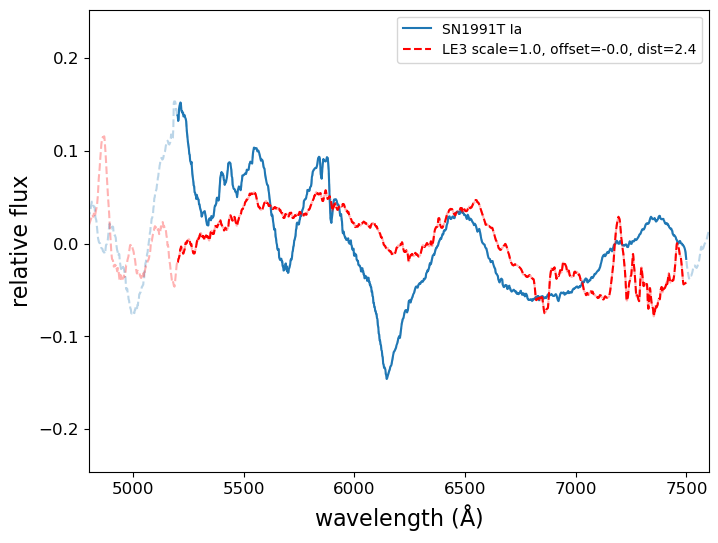

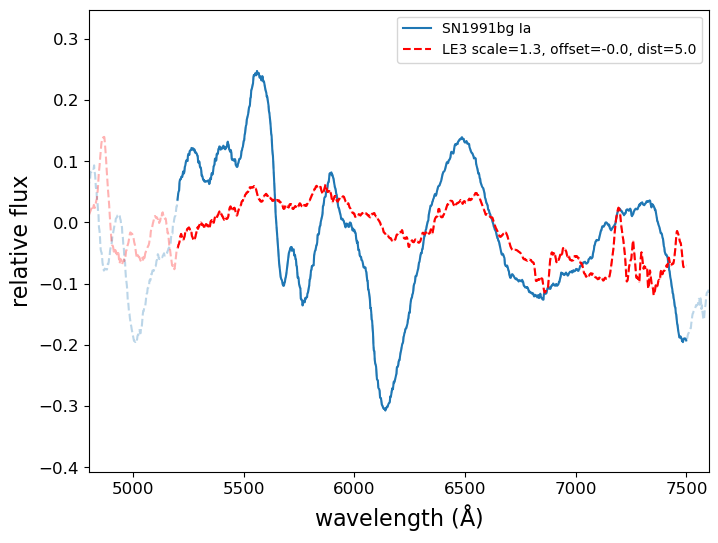

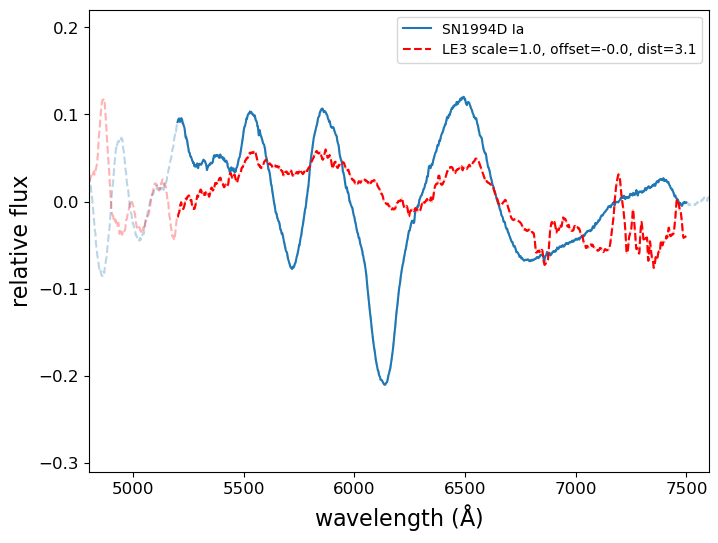

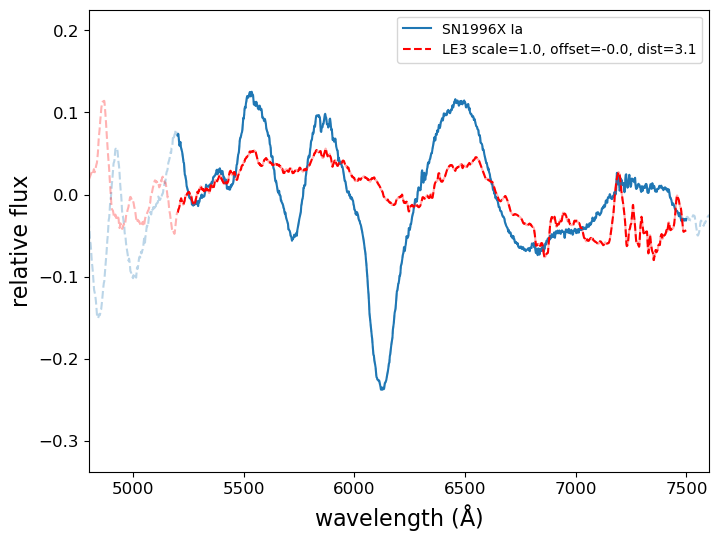

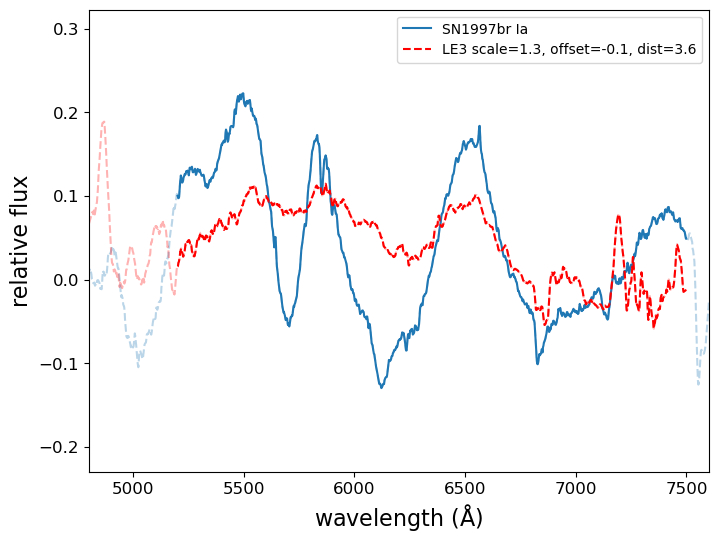

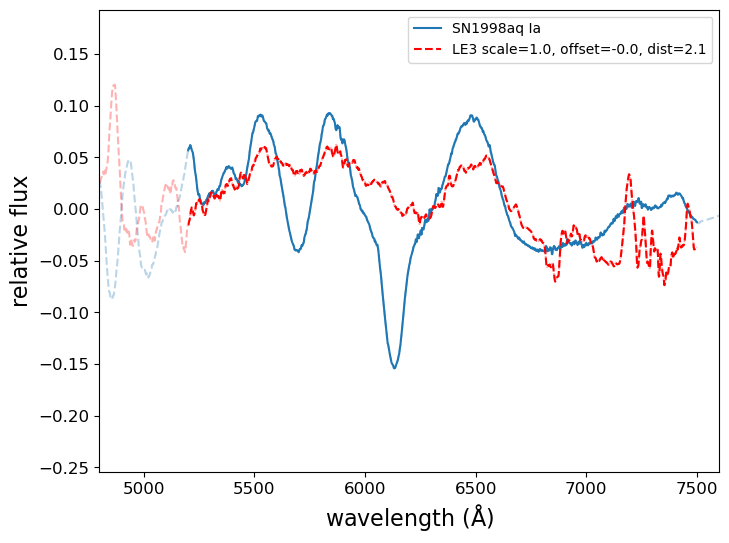

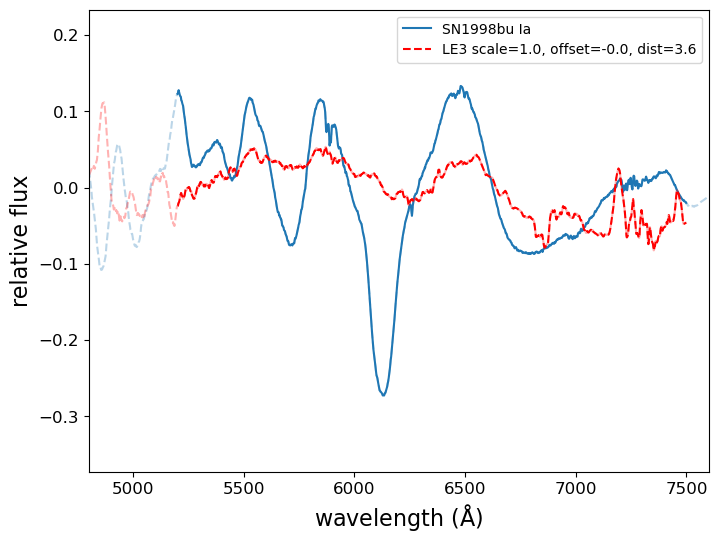

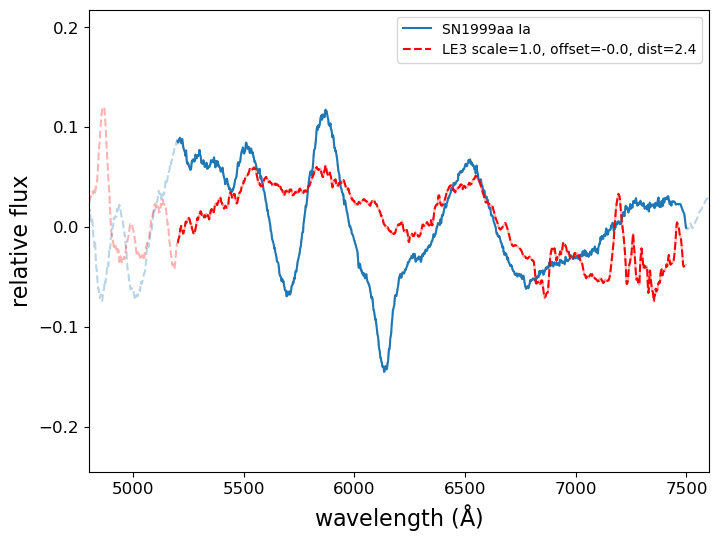

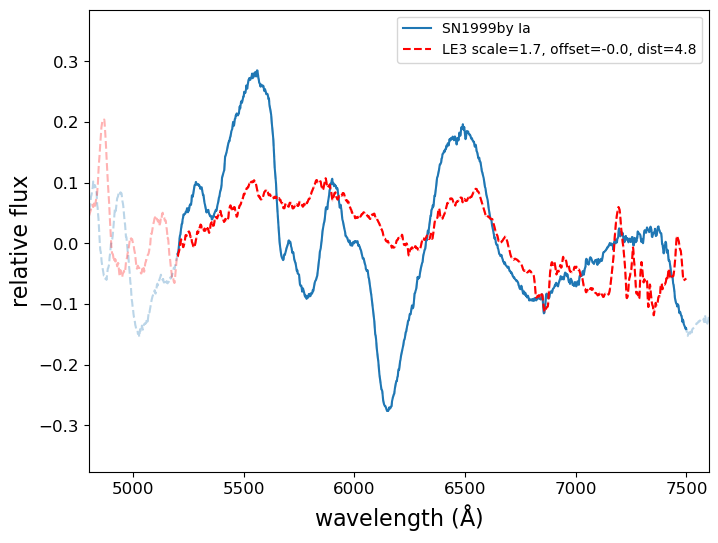

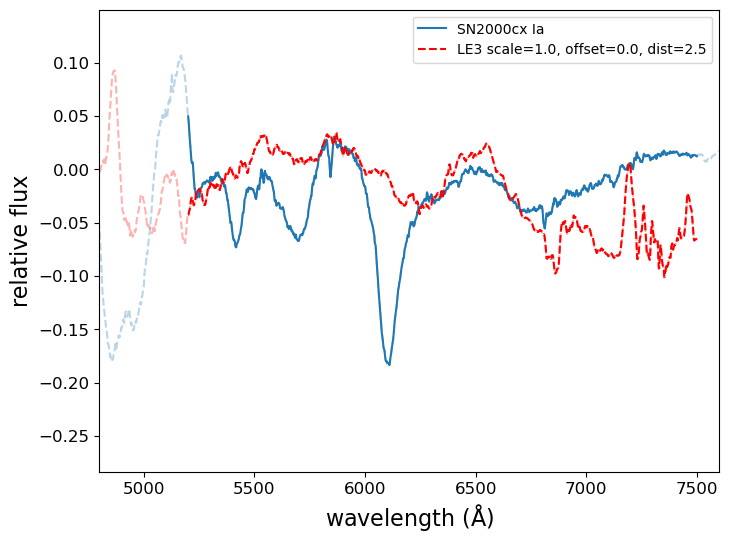

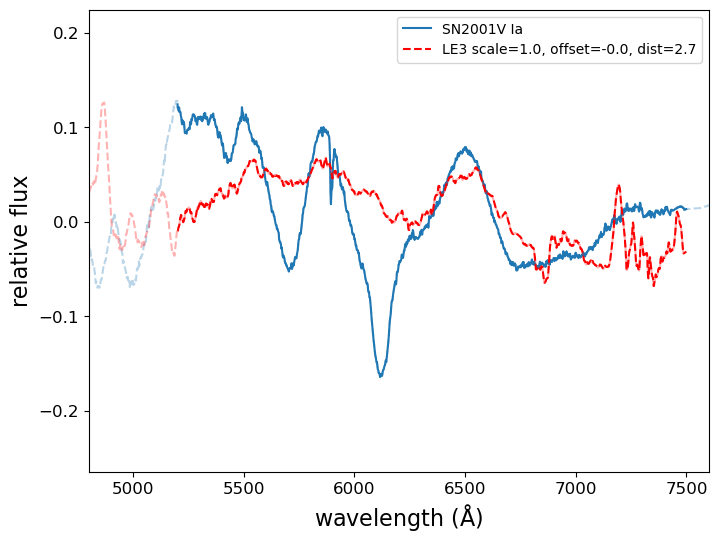

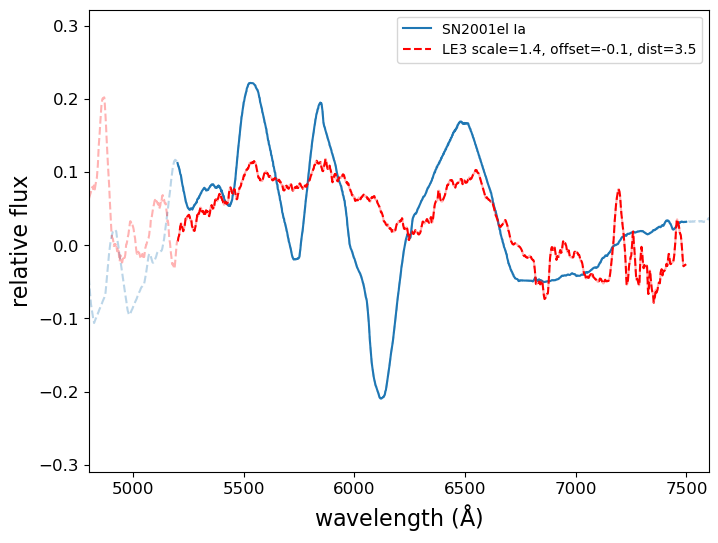

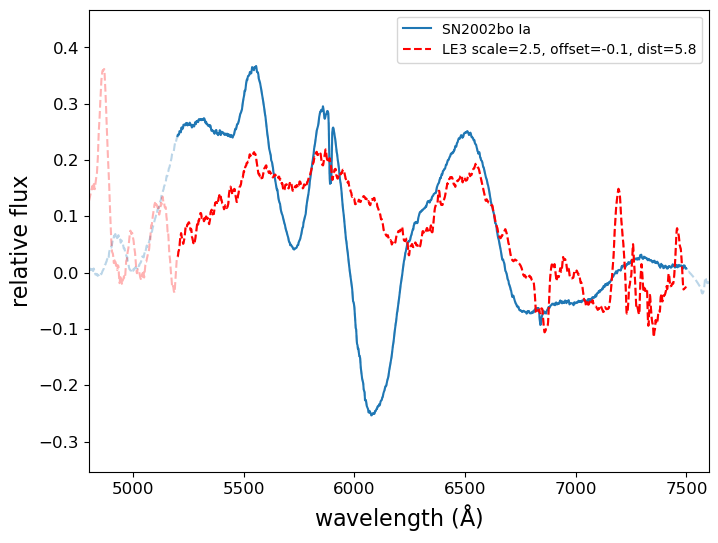

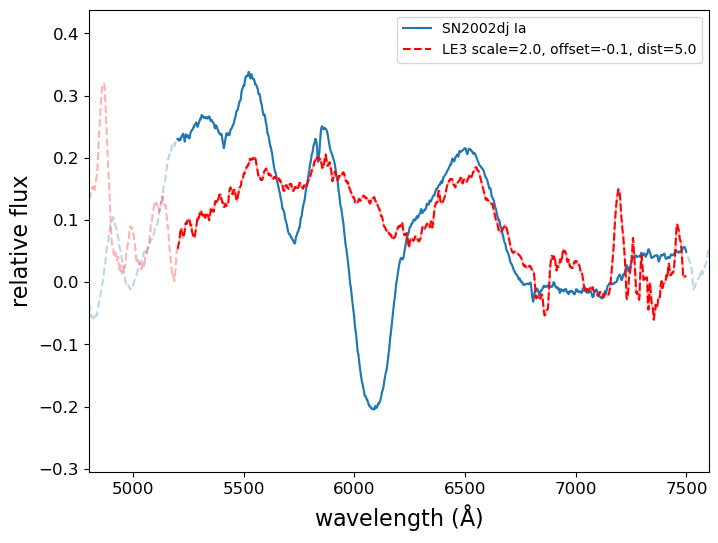

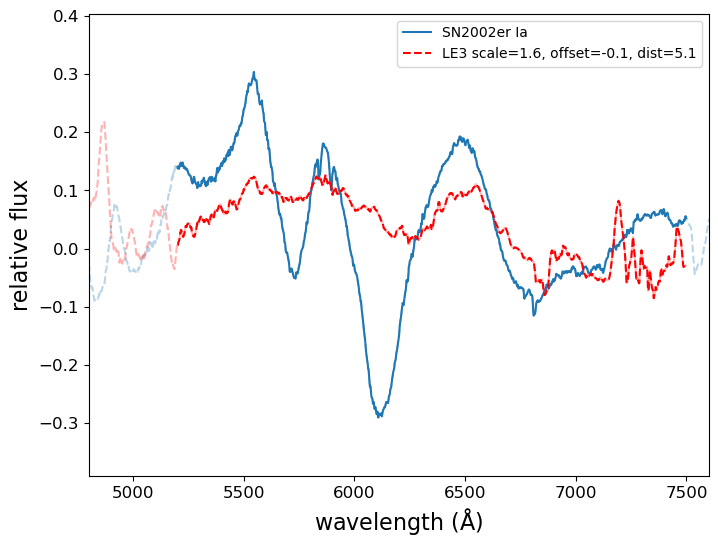

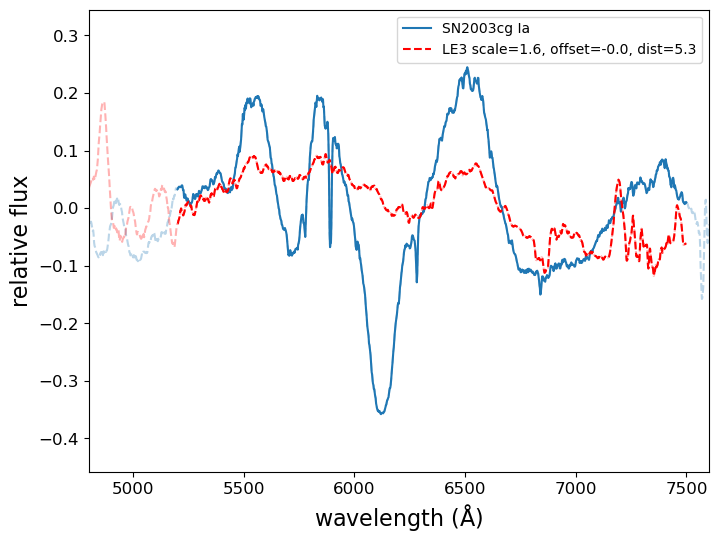

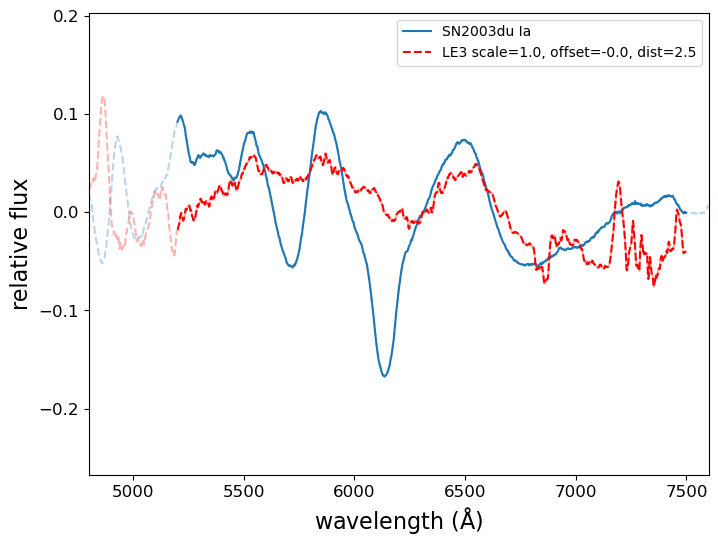

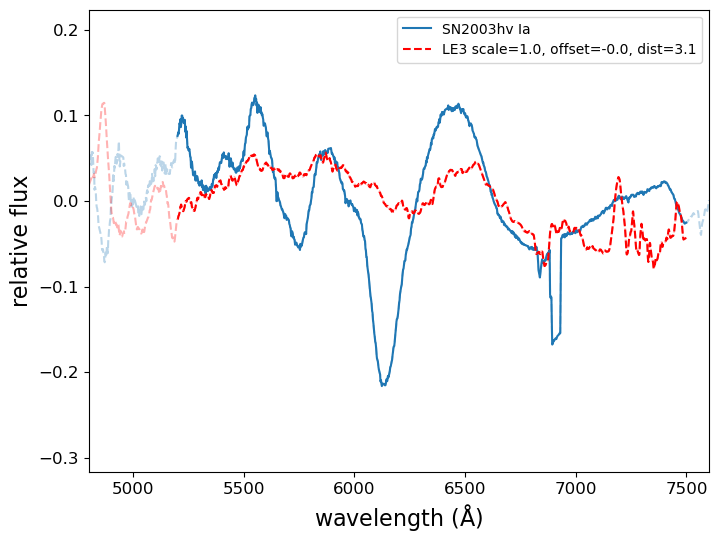

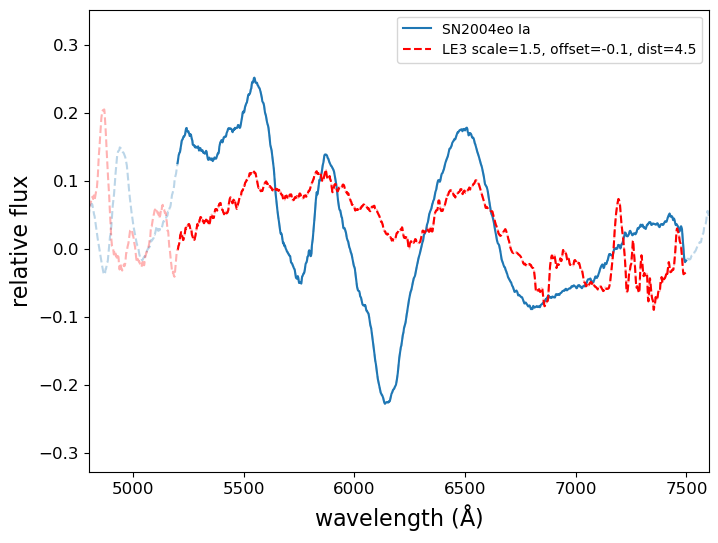

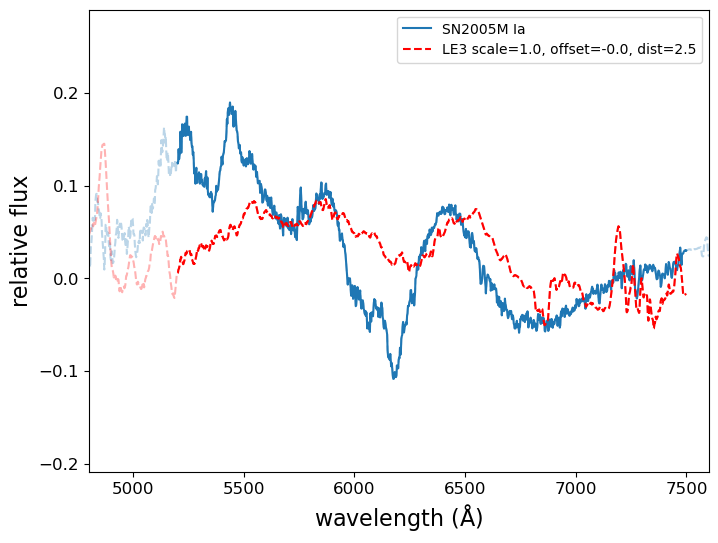

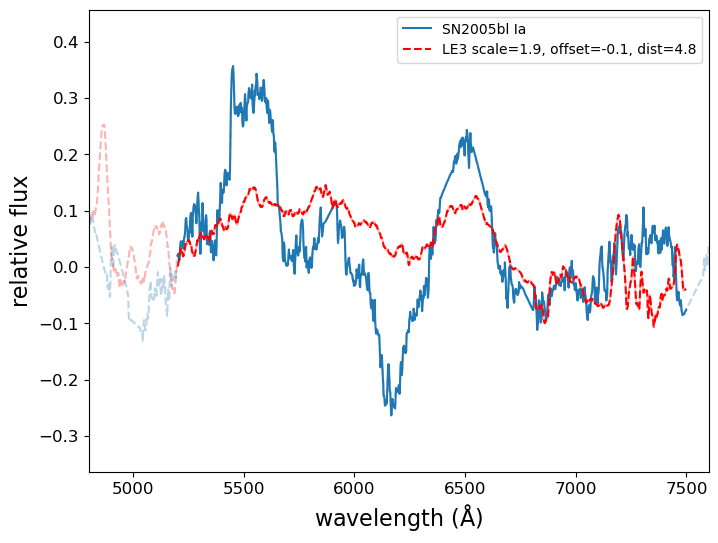

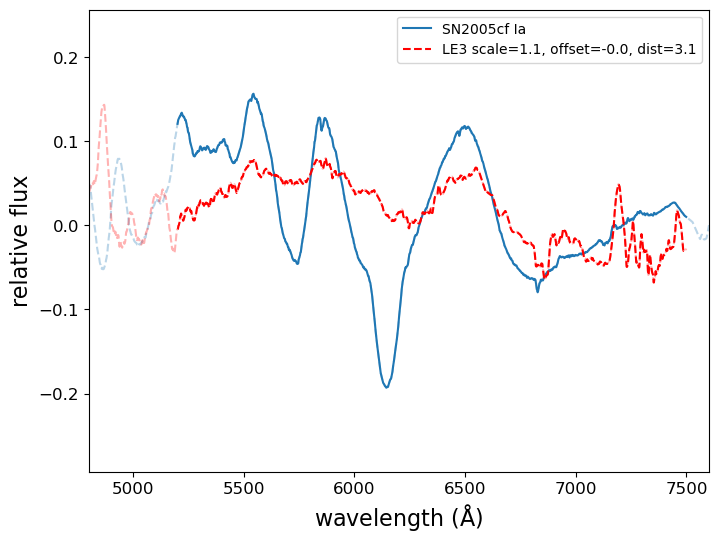

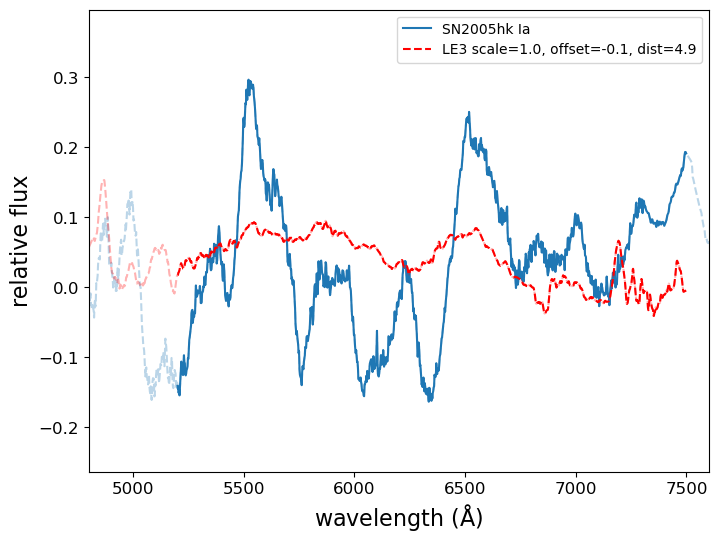

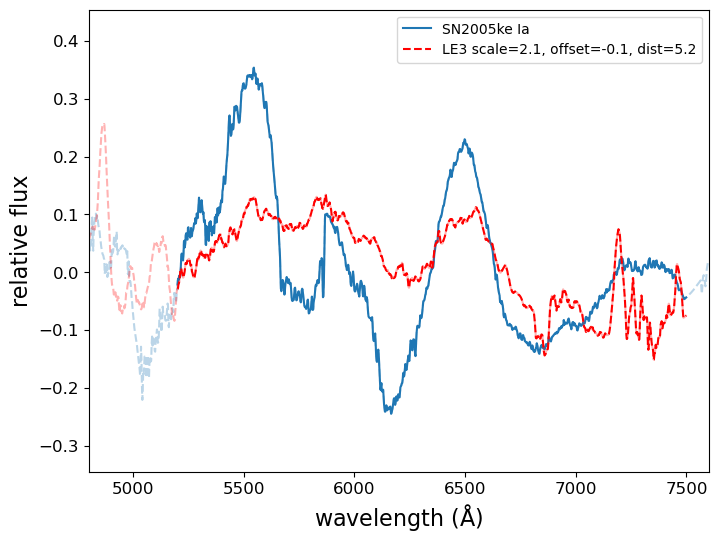

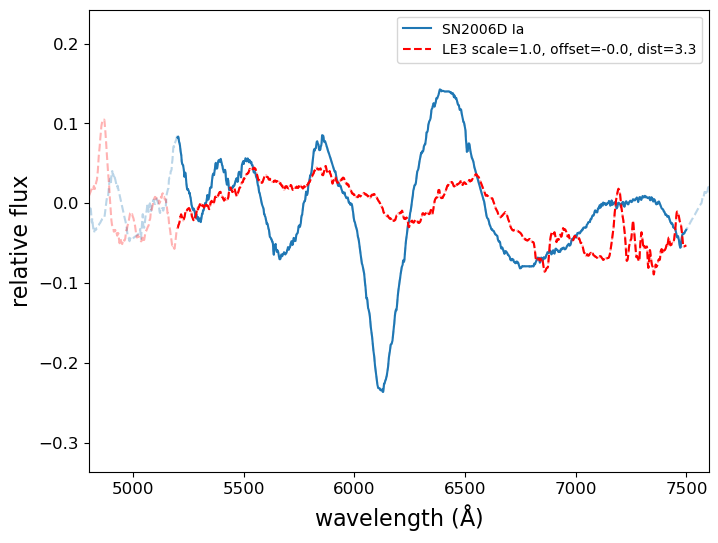

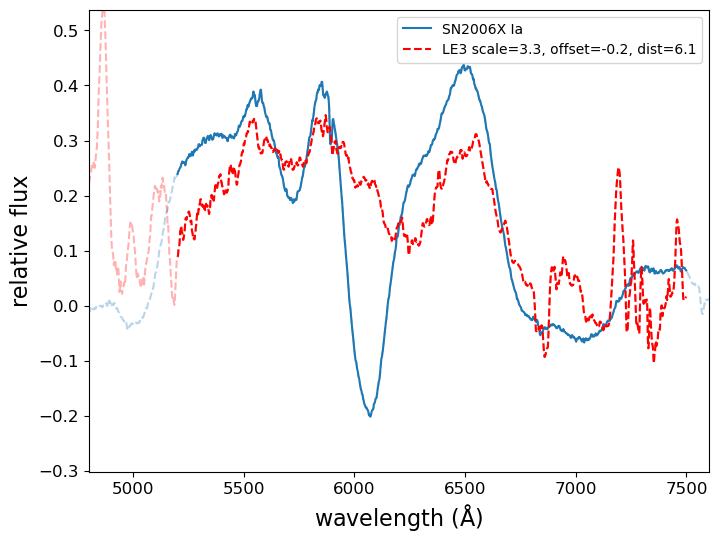

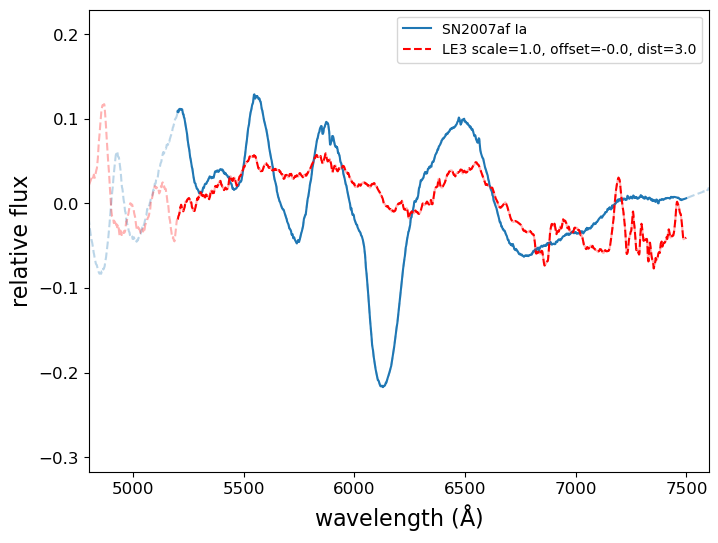

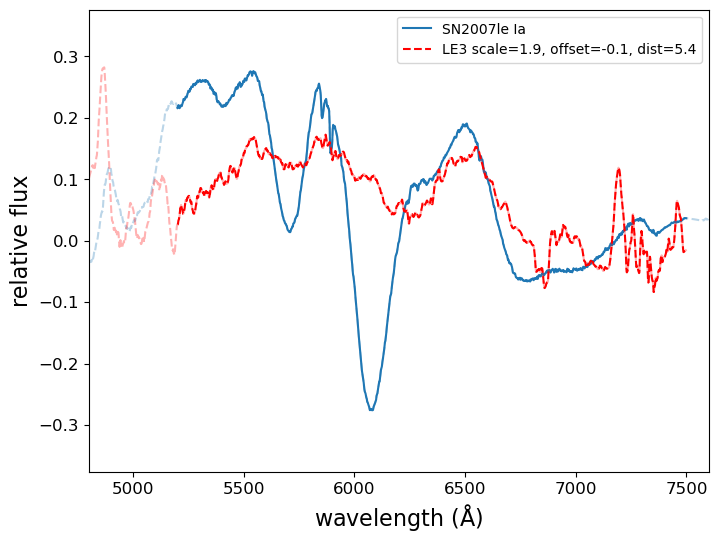

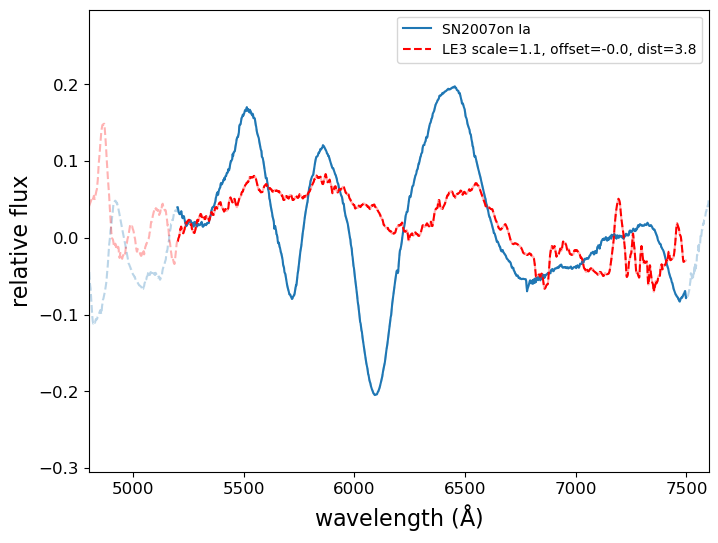

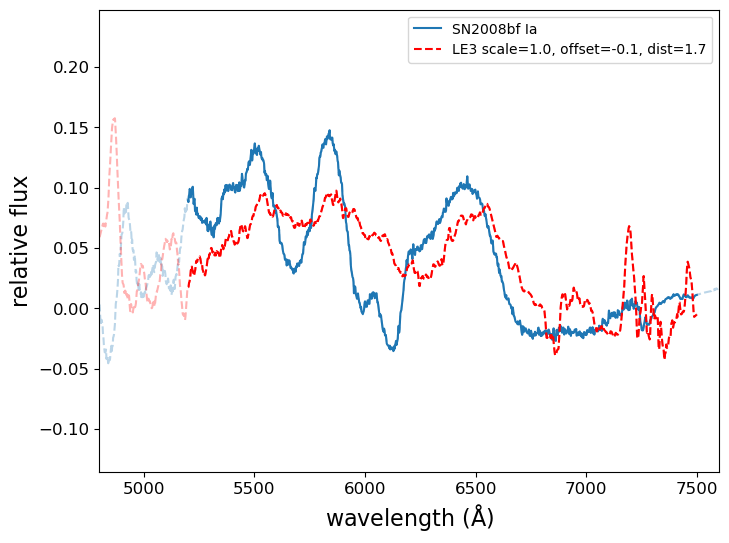

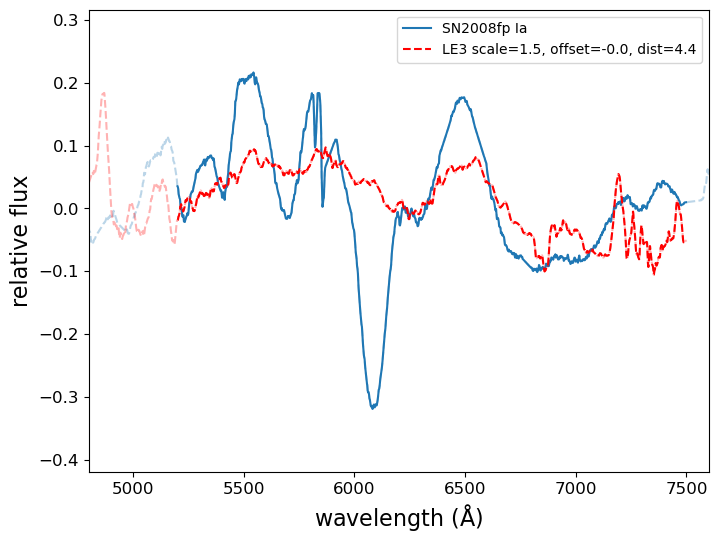

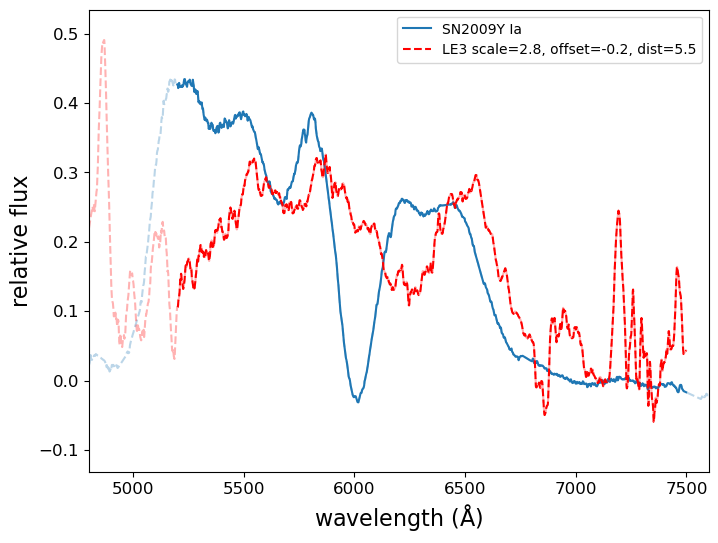

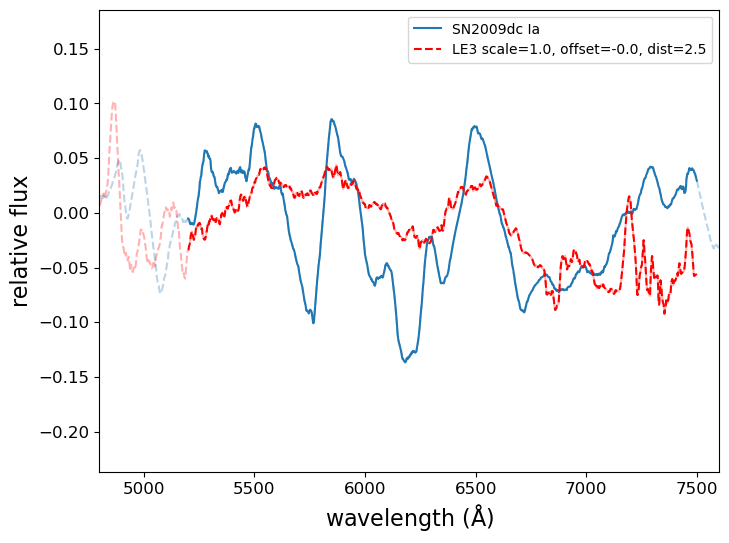

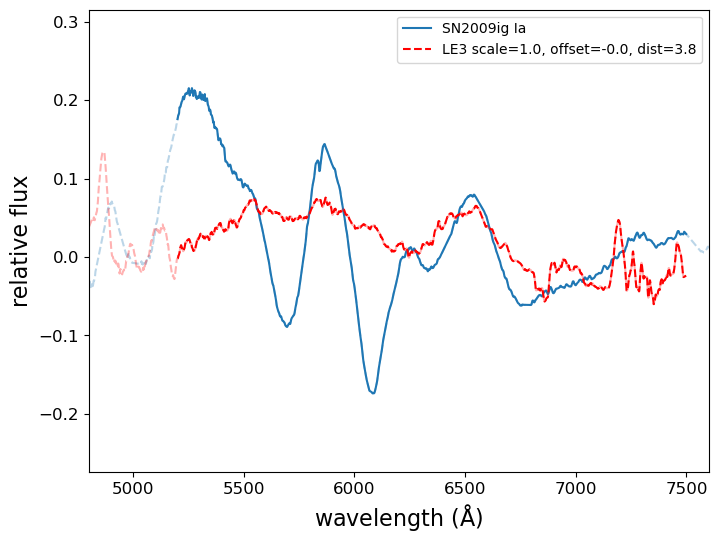

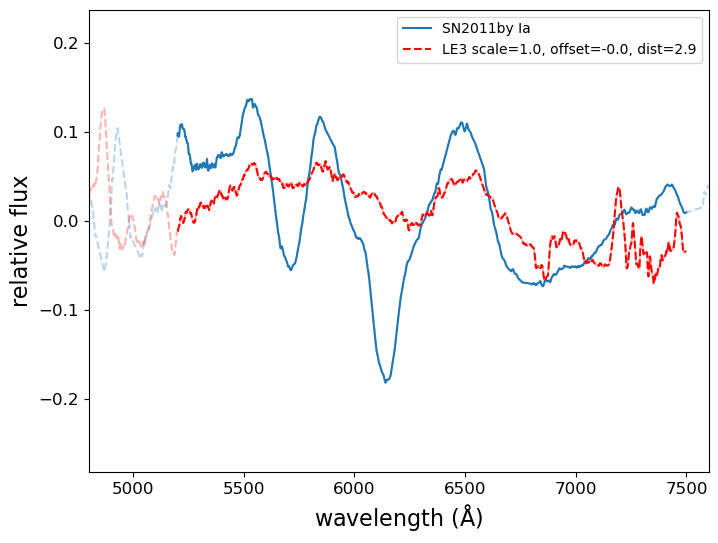

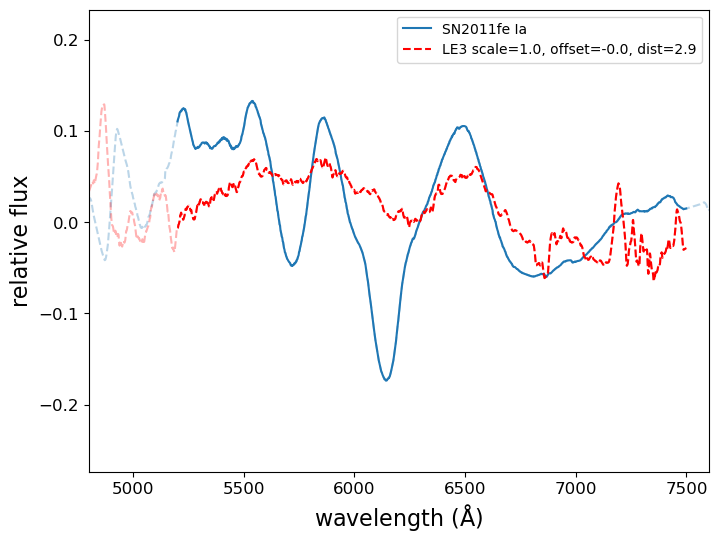

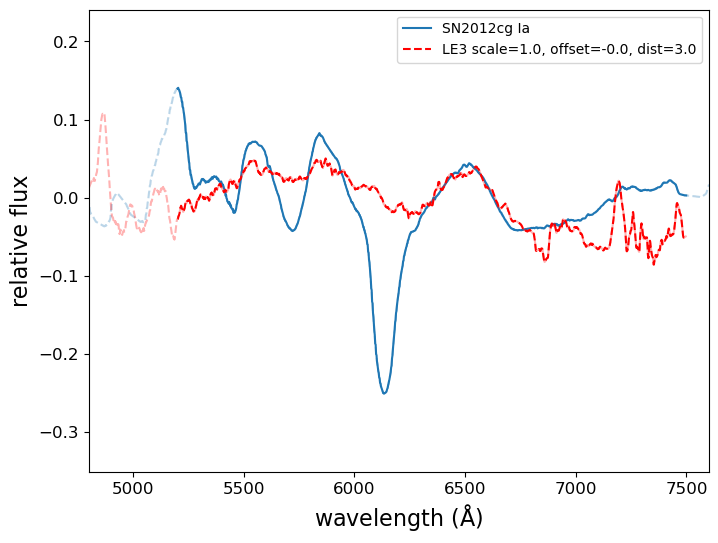

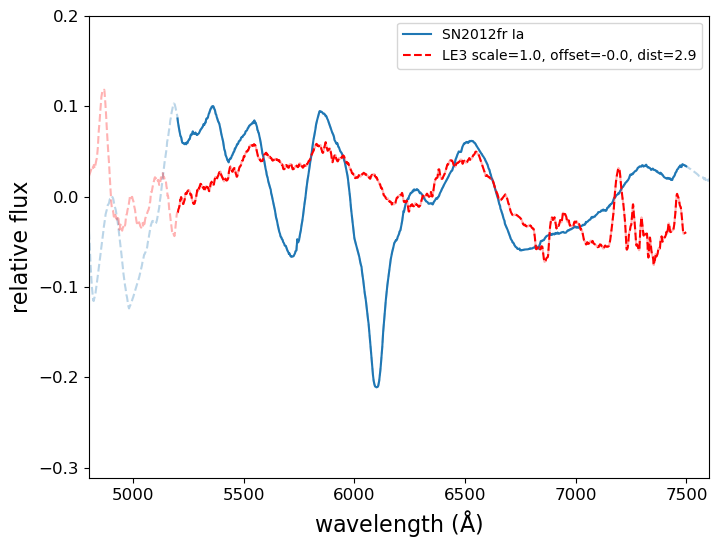

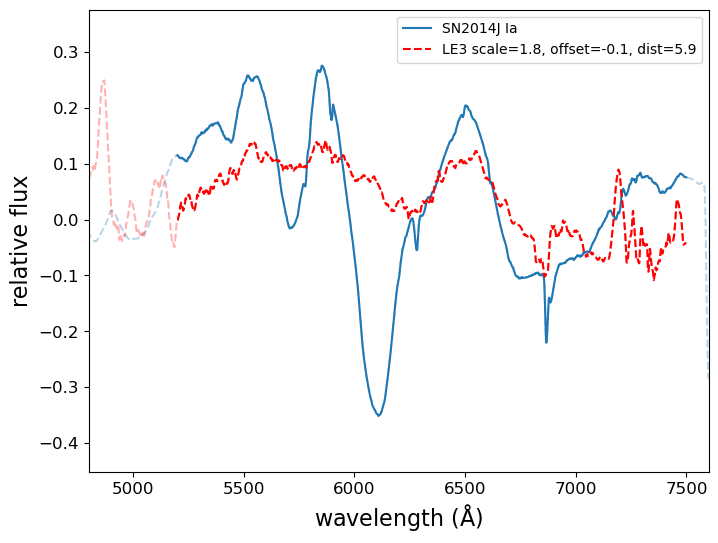

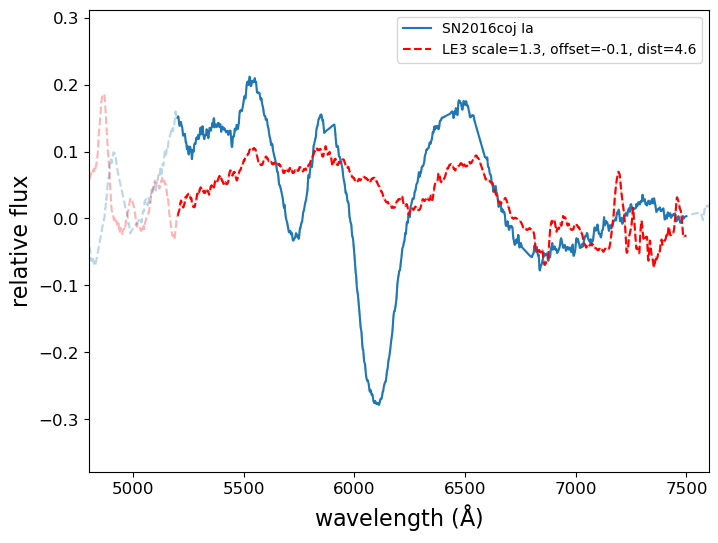

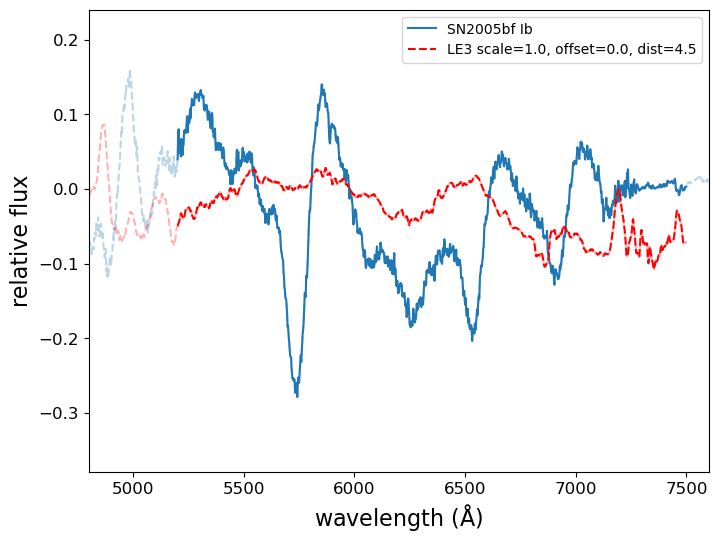

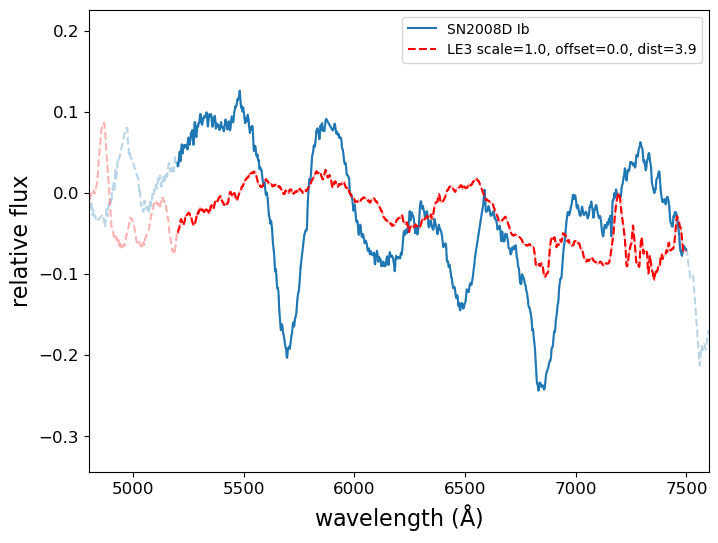

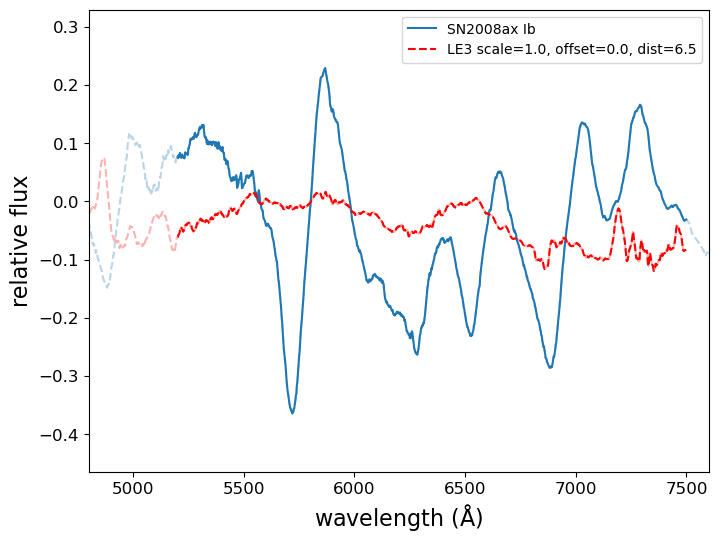

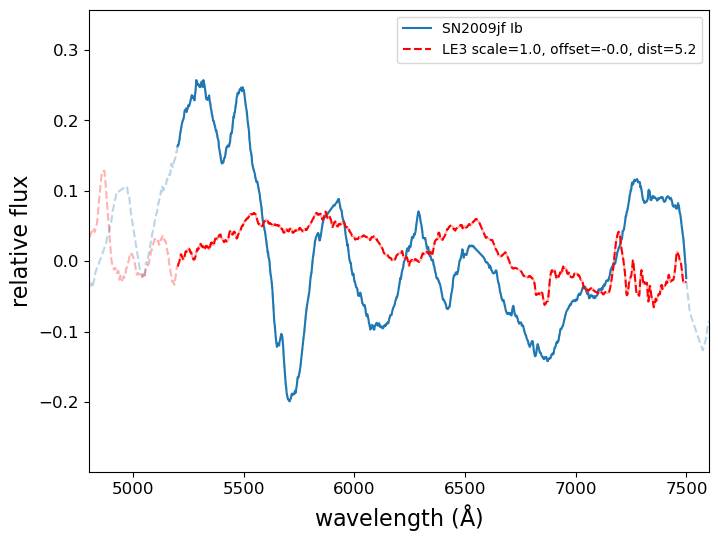

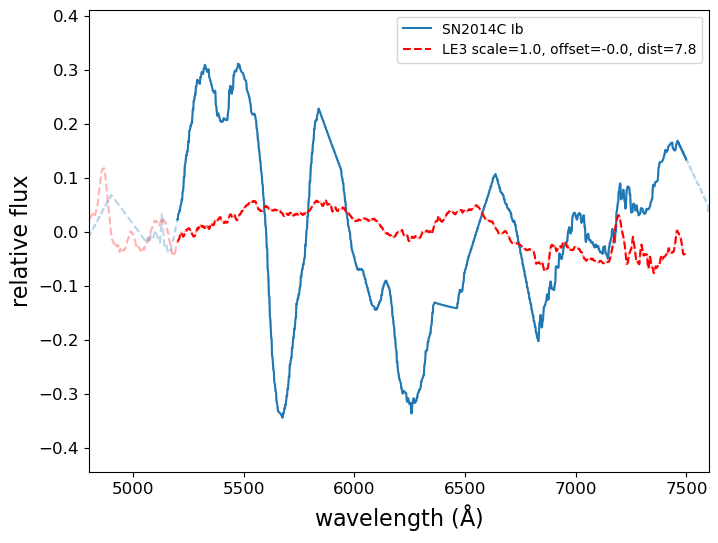

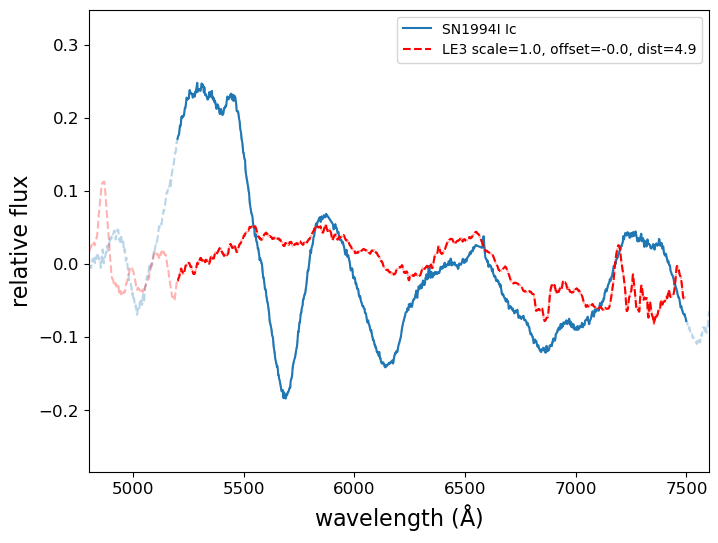

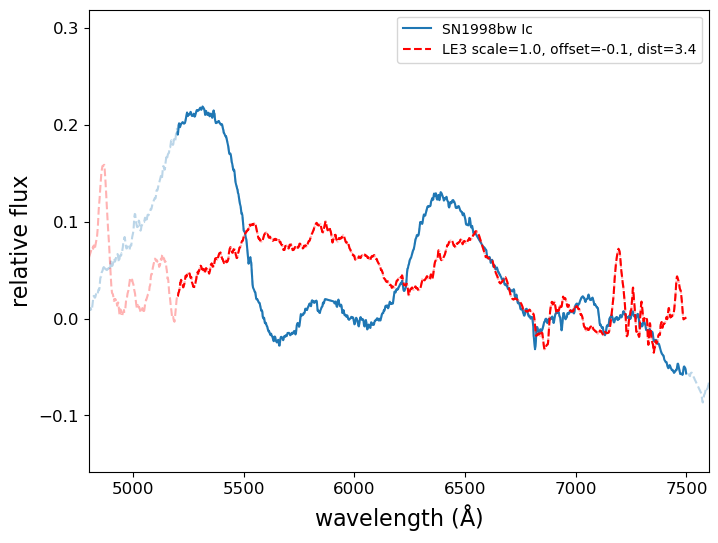

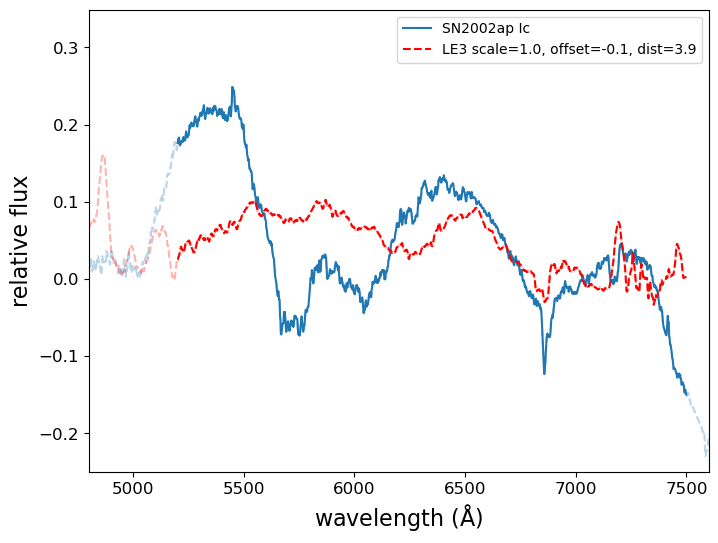

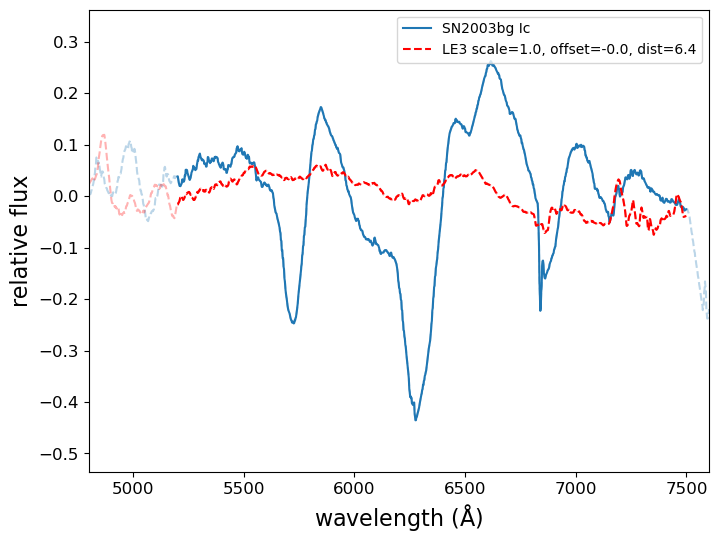

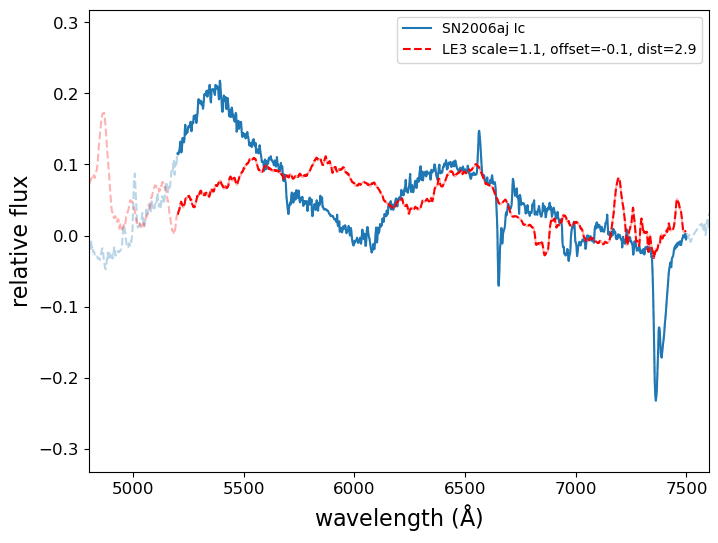

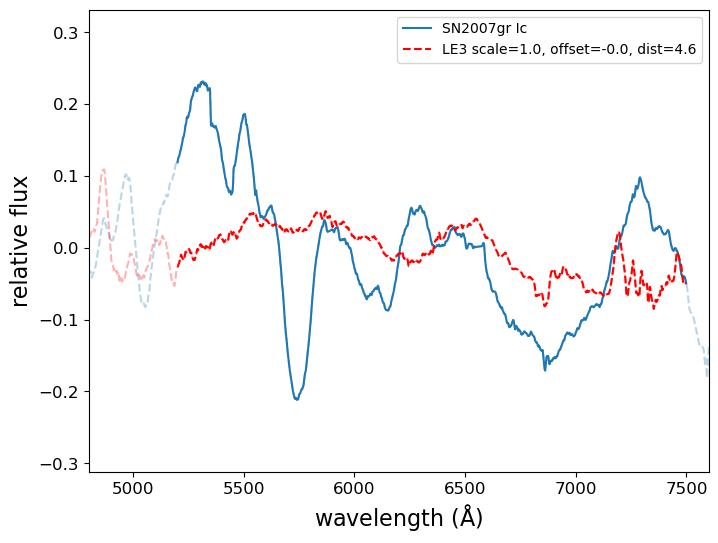

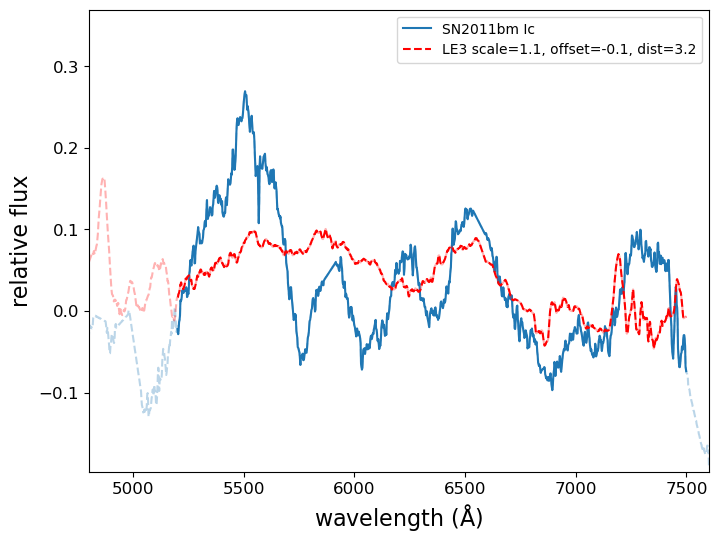

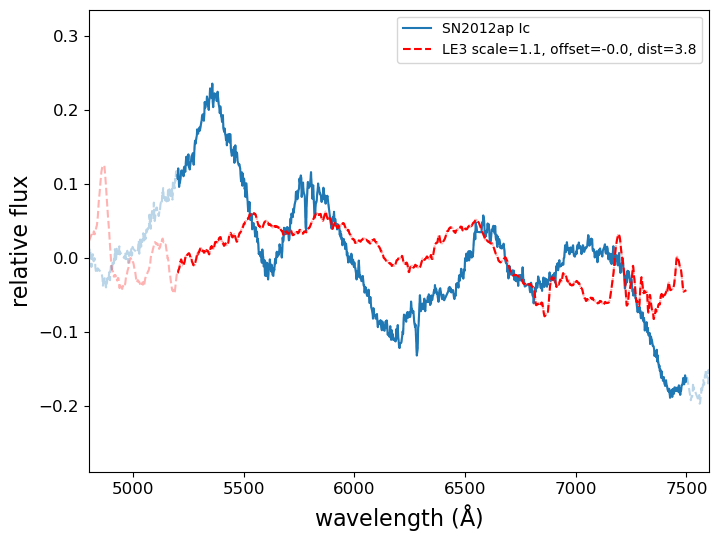

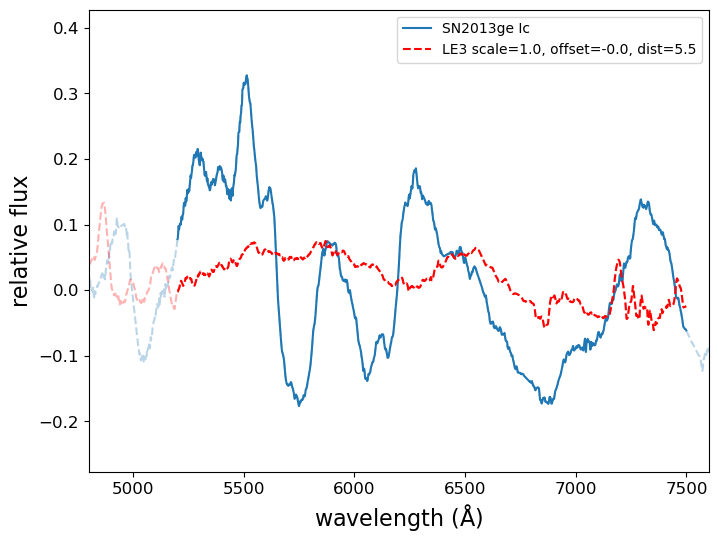

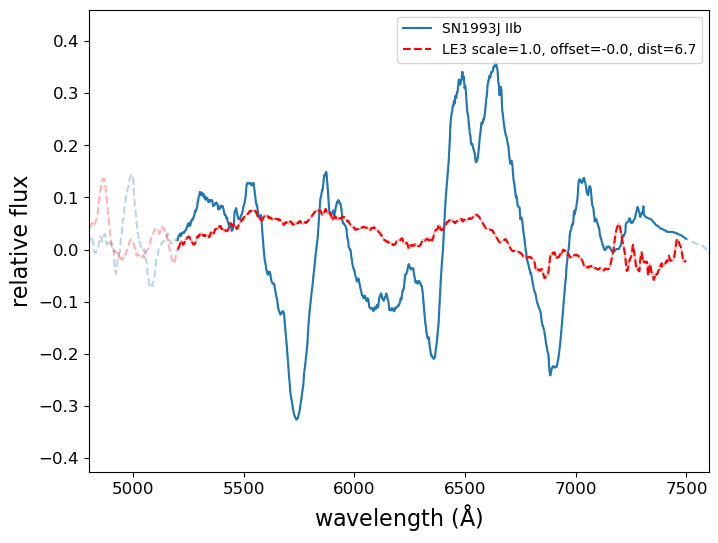

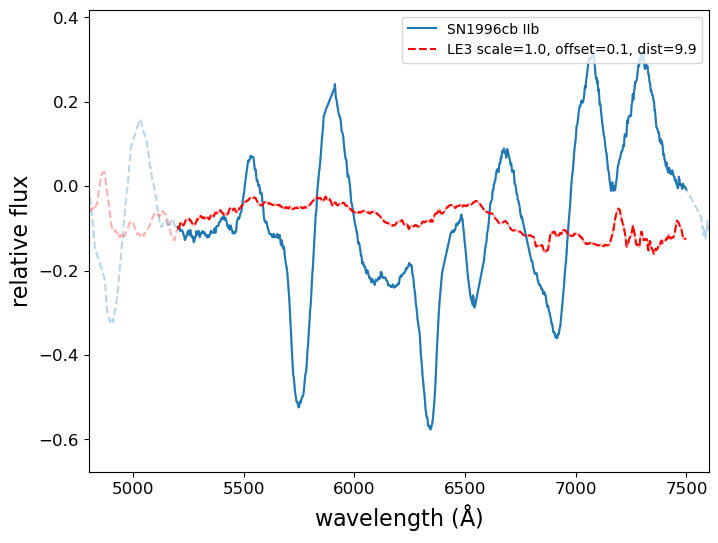

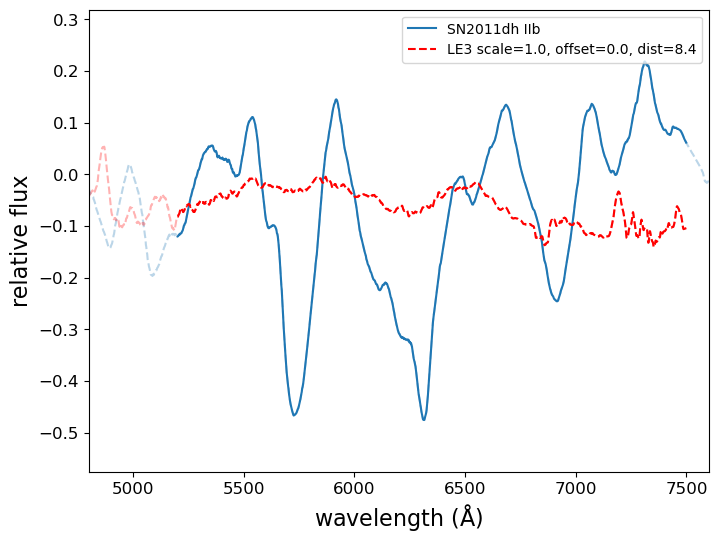

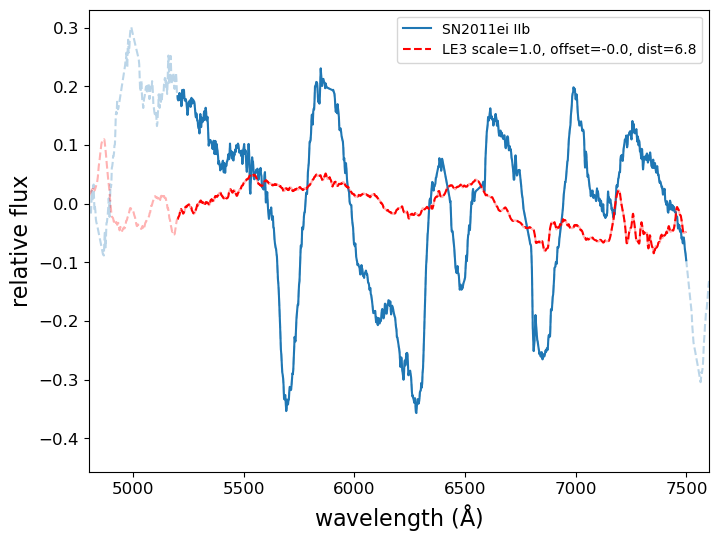

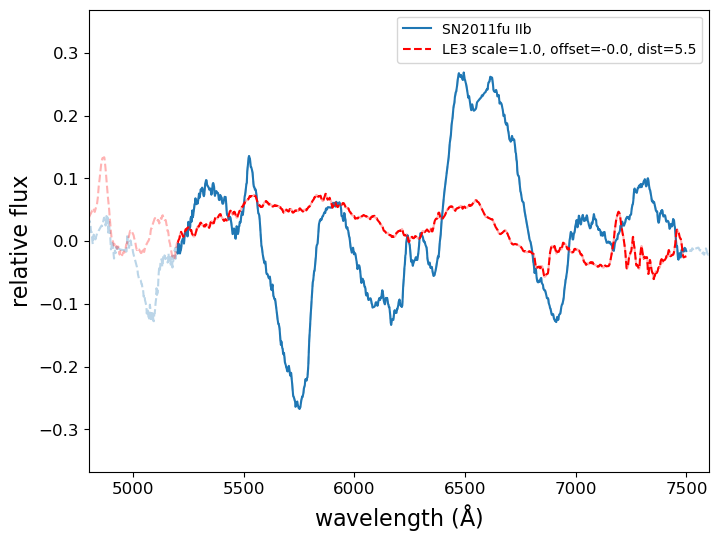

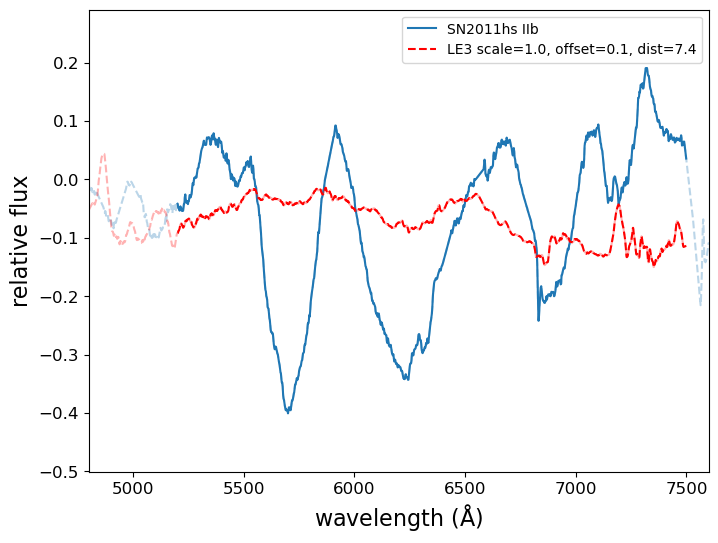

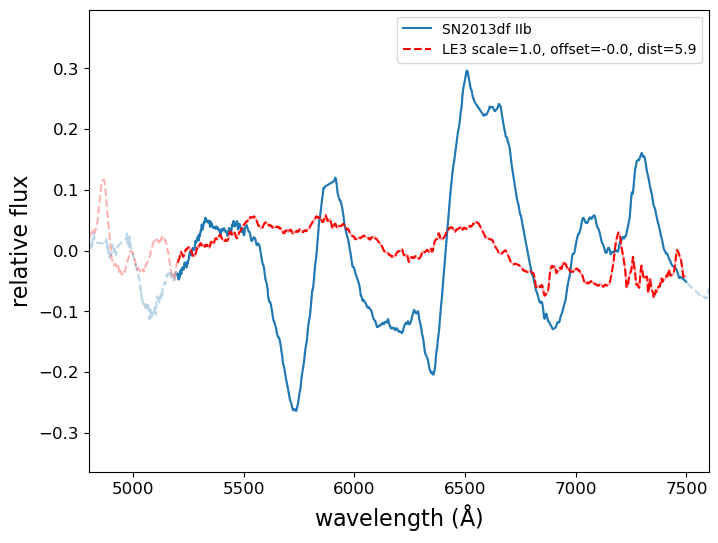

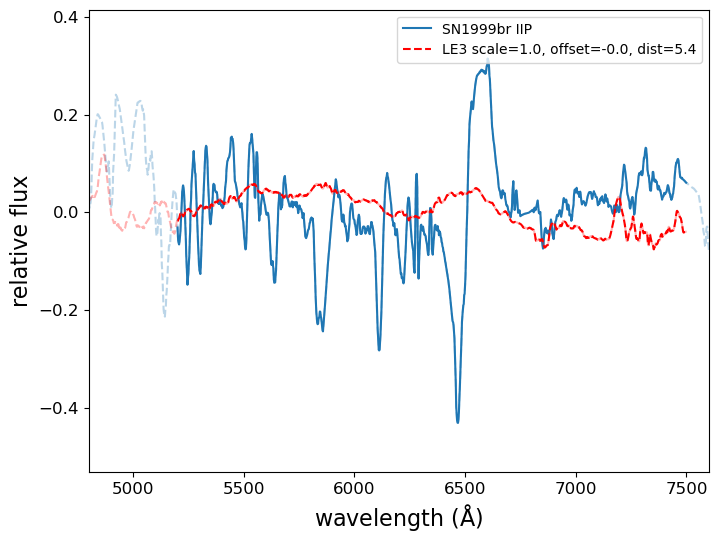

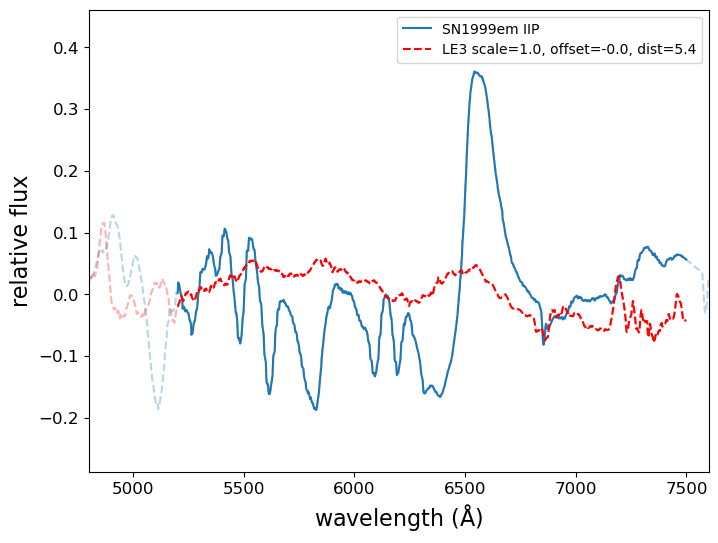

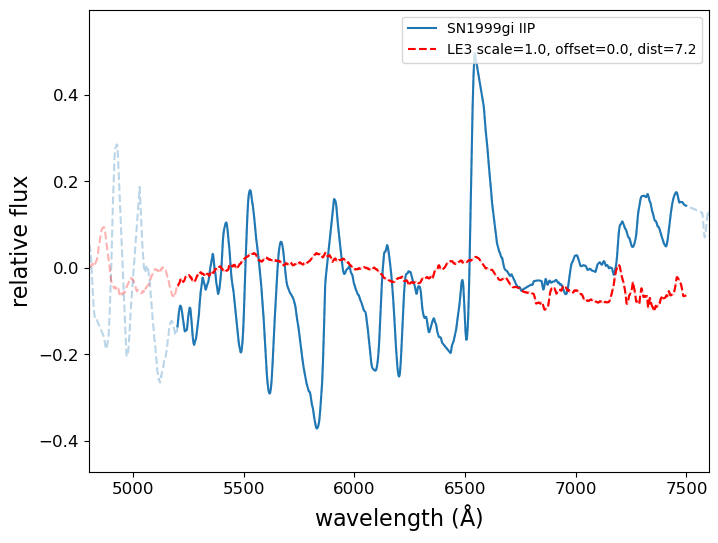

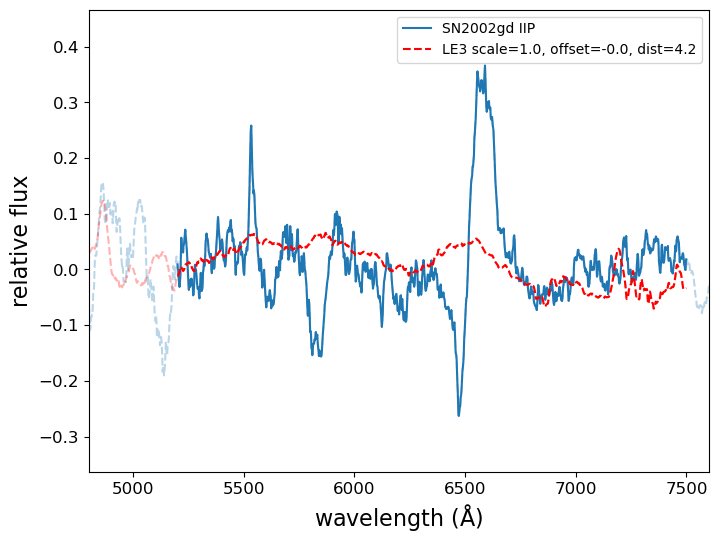

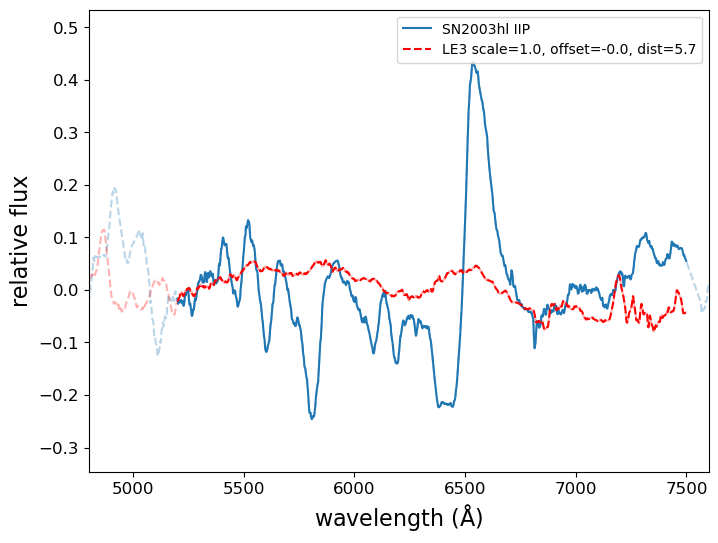

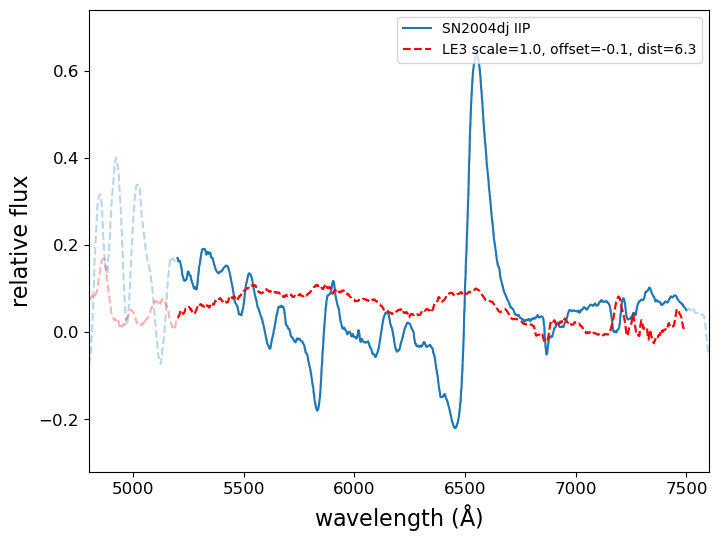

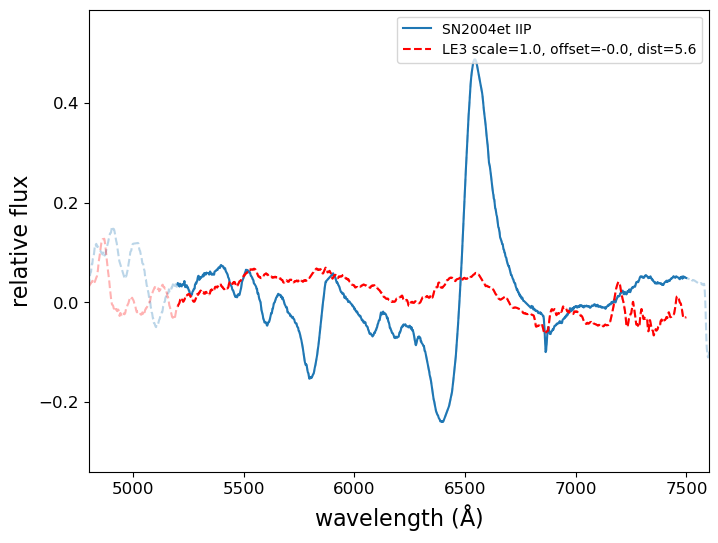

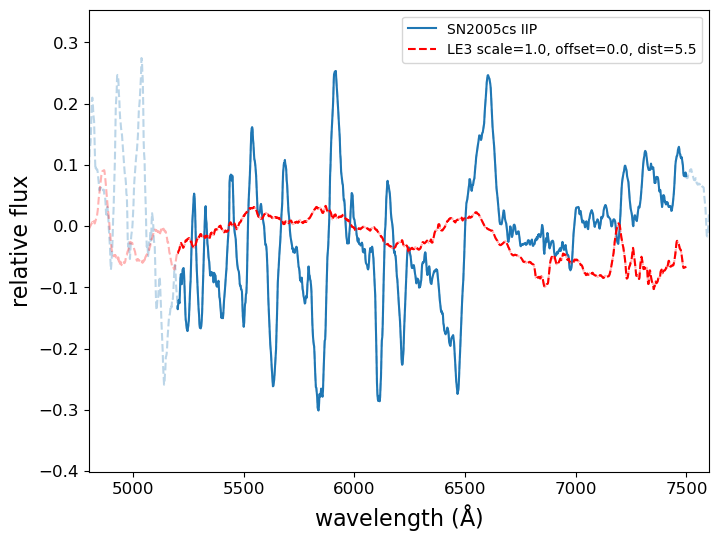

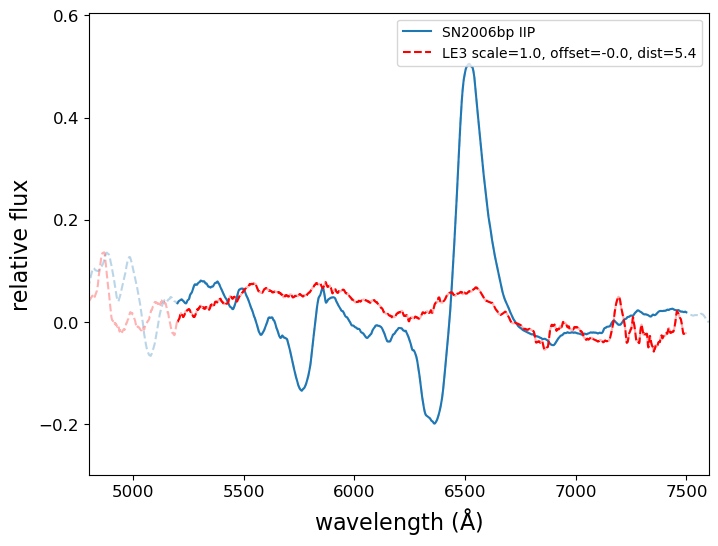

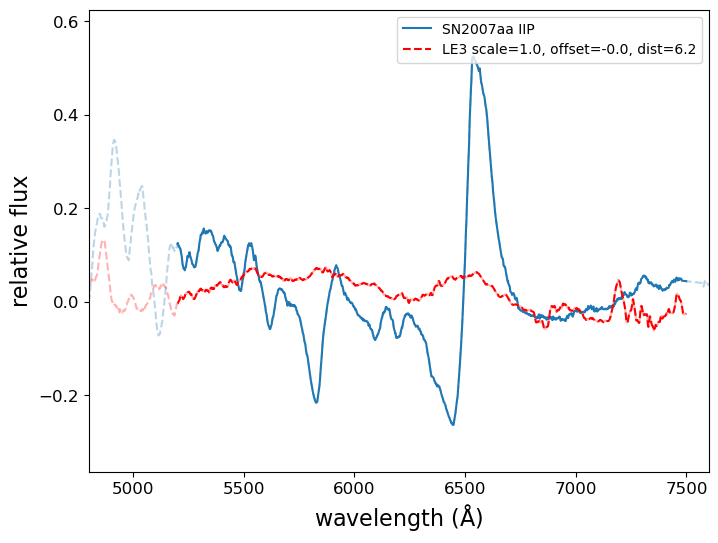

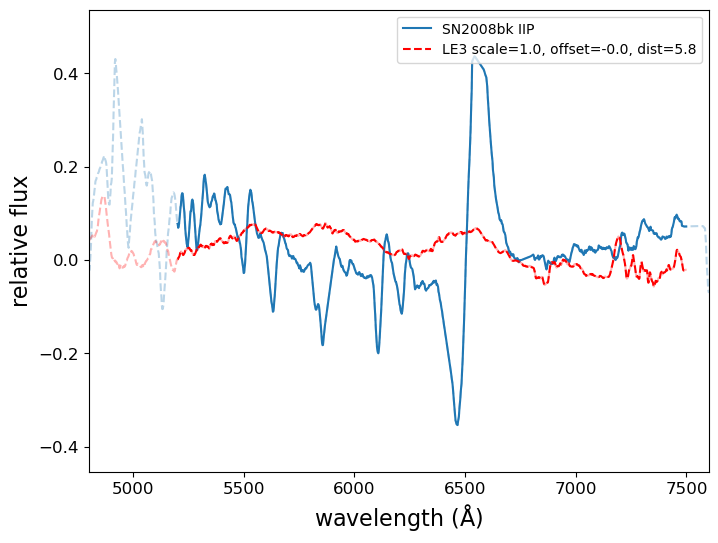

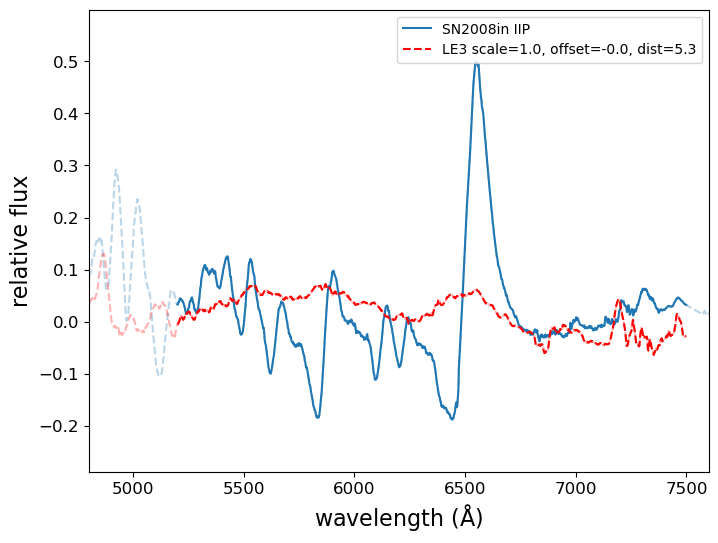

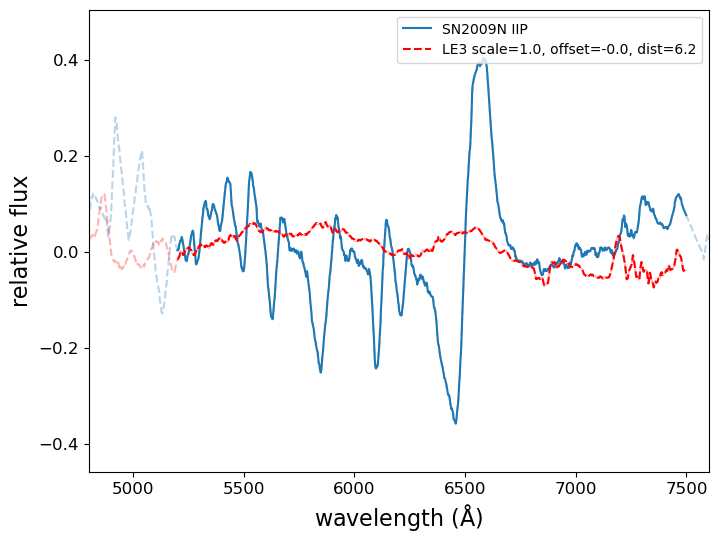

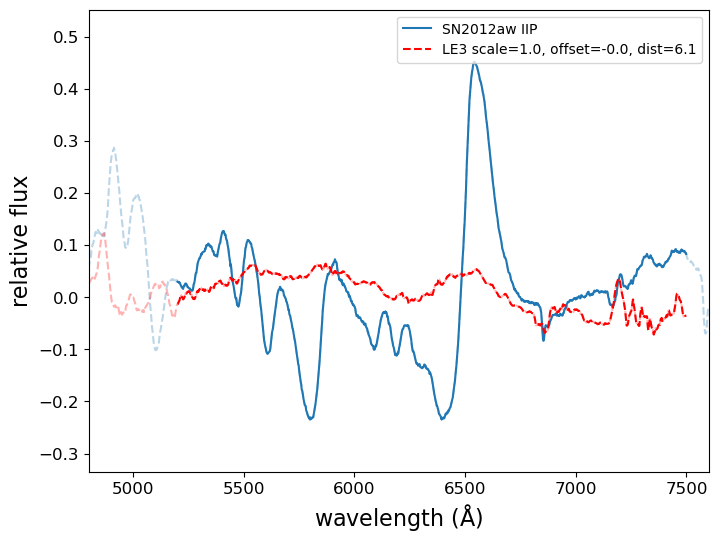

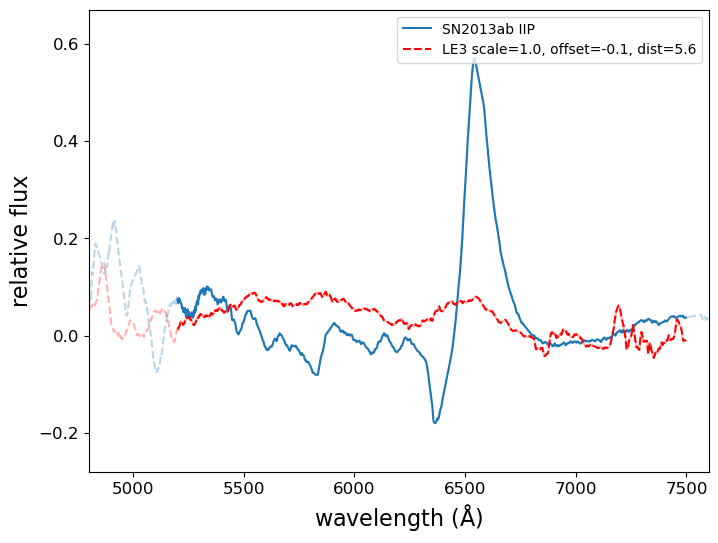

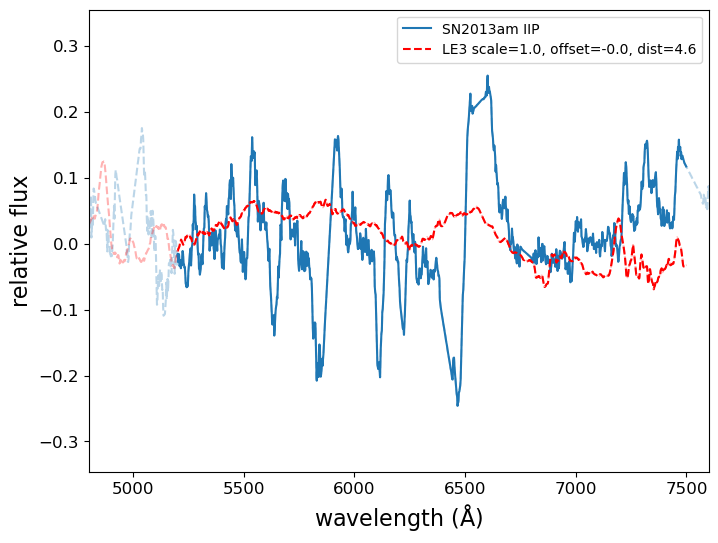

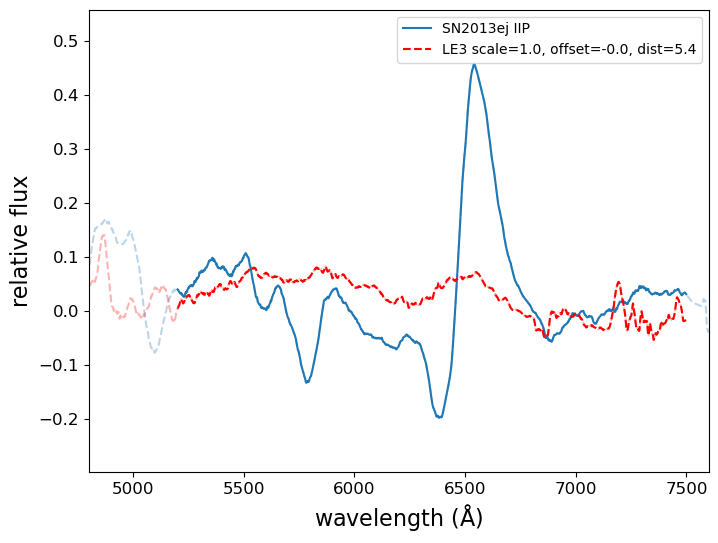

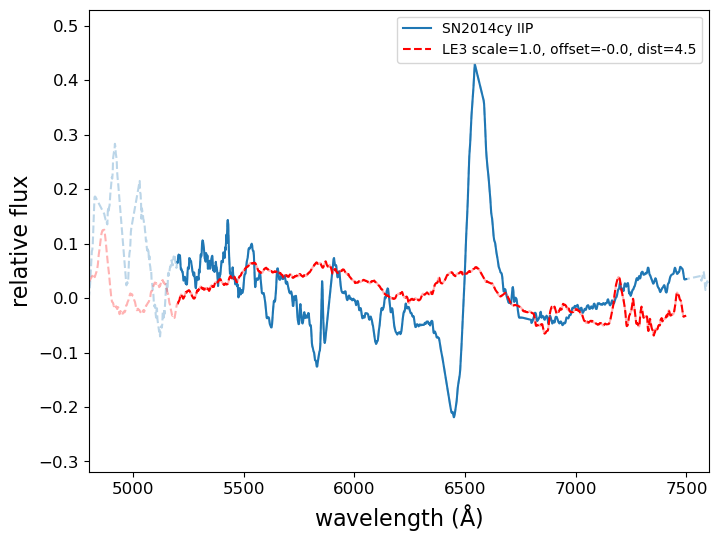

In [1229]:
for i in df_LEtemplist.Object:

    idx = df_LEtemplist[df_LEtemplist['Object'].str.contains(i)].index[0]
    fig = plot_comparision(idx, ax=None, no_continum=no_continum)
    fig.savefig(f"../../../../Desktop/thesis/figures/dist_plot/{leId}_dist_{i}.png")


59 1.0


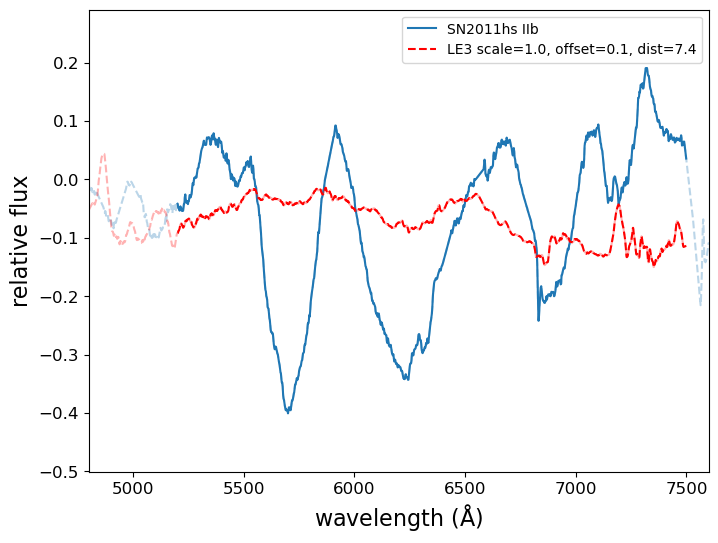

In [1187]:
idx = df_LEtemplist[df_LEtemplist['Object'].str.contains("11hs")].index[0]



fig = plot_comparision(idx, ax=None, no_continum=no_continum)
#fig.savefig(f"../../../../Desktop/thesis/figures/dist/plot/{leId}_dist_11hs.png")



In [1340]:
def plot_comparision(best_idx, ax=ax, no_continum=False):
    
    if ax==None:
        fig, ax = plt.subplots(figsize=(8, 6))
    
    i = best_idx
    
    df_LE = dic_LE[leId]
    dic = df_LEtemplist['res'][i]
    snid = df_LEtemplist['Filename'][i].replace('.txt', '').split('_')[-1]
    sntype = df_LEtemplist['Type'][i]
    txtfile = df_LEtemplist['Filename'].values[i]

    df_LEtemp = pd.read_csv('LEtemp/snid_txt/'+txtfile, skiprows=2,
            names=['wavelength', 'flux'],
            delim_whitespace=True, )

    LEobs_wave = df_LE.wavelength.values
    LEobs_flux = df_LE.flux_smooth_norm.values
    
    LEtemp_wave = df_LEtemp.wavelength.values
    LEtemp_flux = df_LEtemp.flux.values
    
        
    # remove continum
    if no_continum:
        LEtemp_flux, LEobs_flux_cont= remove_continum(LEtemp_wave, LEtemp_flux, step=600)
    
        LEobs_flux, LEobs_flux_cont= remove_continum(LEobs_wave, LEobs_flux, step=600)

    
    
    LEobs_wave_cut, LEobs_flux_cut = cut_spectra(LEobs_wave, LEobs_flux, renorm=False,
                                                 wmin=5200, wmax=7200)

    LEtemp_wave_cut, LEtemp_flux_cut = cut_spectra(LEtemp_wave, LEtemp_flux, renorm=False,
                                                 wmin=5200, wmax=7200)
    
    # interp to observed wavelength
    LEtemp_flux_cut = np.interp(LEobs_wave_cut, LEtemp_wave, LEtemp_flux)

    
    # plot
    ax.plot(LEobs_wave_cut, LEtemp_flux_cut, label=f"{snid} {sntype}", )
    ax.plot(LEtemp_wave, LEtemp_flux, linestyle='--', alpha=.3, c=matplotlib.cm.tab10(0))

    scale = dic['x'][0]
    offset = dic['x'][1]
    dist_value = dic['fun']
    print(i, scale)
    
    ax.plot(LEobs_wave_cut, scale*LEobs_flux_cut-offset, c='r', linestyle='--',
             label=f'{leId} scale={scale:.1f}, offset={offset:.1f}, dist={dist_value:.1f}')

    ax.plot(LEobs_wave, scale*LEobs_flux-offset, c='r', linestyle='--', alpha=.3)

    ax.set_xlim([4800, 7601])
    ax.set_ylim([LEtemp_flux_cut.min()-0.1, LEtemp_flux_cut.max()+.1])
    #ax.legend(bbox_to_anchor=(1, 1), fontsize=10,)
    ax.legend(bbox_to_anchor=(1, 1), fontsize=10, loc='upper right')
    
    ax.set_xlabel(r'wavelength ($\mathrm{\AA}$)')
    ax.set_ylabel('relative flux')
    return ax.figure